**1. Apply PCA to the images from different conditions (each folder contains images for one of the conditions: realistic, features, blurred, geons, and silhouettes; you need to apply PCA separately for images in each of the folders).  How many components do you need to preserve at least 95% of the variance in each condition? Why do some conditions require more components than others?  [3 points]**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing images to python done with help of ChatGPT
import os
from PIL import Image

def import_images(folder_path):
  image_size = (128, 128) #Resize images to all be the same dimension, PCA doesn't work otherwise
  images = []

  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert("L")   # convert image to grayscale
    img = img.resize(image_size)
    images.append(np.array(img))

  images = np.array(images)

  print('Shape before flattening, before PCA:', images.shape)

  X = images.reshape(len(images), -1) #Flatten images to 2d
  #42 images x 16384 pixels for each iamges
  print('Shape after flattening, before PCA:', X.shape)
  return X

Blurred Images:

In [3]:
from sklearn.decomposition import PCA
#Load the blurred images
X_blurred = import_images('/content/drive/MyDrive/image_files/v0/blurred')

# Keep 95% of the variance
pca = PCA(n_components = 0.95)
X_pca_blurred = pca.fit_transform(X_blurred)

# print(pca.explained_variance_ratio_)
print('Shape after PCA:', X_pca_blurred.shape)

Shape before flattening, before PCA: (42, 128, 128)
Shape after flattening, before PCA: (42, 16384)
Shape after PCA: (42, 15)


You only need 15 components to keep 95% of the variance for blurred images.

Features Images:


In [4]:
from sklearn.decomposition import PCA
#Load the features images
X_features = import_images('/content/drive/MyDrive/image_files/v0/features')

# Keep 95% of the variance
pca = PCA(n_components = 0.95)
X_pca_features = pca.fit_transform(X_features)

# print(pca.explained_variance_ratio_)
print('Shape after PCA:', X_pca_features.shape)

Shape before flattening, before PCA: (42, 128, 128)
Shape after flattening, before PCA: (42, 16384)
Shape after PCA: (42, 31)


You only need to keep 31 components to keep 95% of the variance for features images.

Geons Images:

In [5]:
from sklearn.decomposition import PCA
#Load the geons images
X_geons = import_images('/content/drive/MyDrive/image_files/v0/geons')

# Keep 95% of the variance
pca_geons = PCA(n_components = 0.95)
X_pca_geons = pca_geons.fit_transform(X_geons)

# print(pca.explained_variance_ratio_)
print('Shape after PCA:', X_pca_geons.shape)

Shape before flattening, before PCA: (60, 128, 128)
Shape after flattening, before PCA: (60, 16384)
Shape after PCA: (60, 37)


You only need to keep 37 compoents to keep 95% of the variance for geons images.

Realistic Images:

In [6]:
from sklearn.decomposition import PCA
#Load the realistic images
X_realistic = import_images('/content/drive/MyDrive/image_files/v0/realistic')

# Keep 95% of the variance
pca_realistic = PCA(n_components = 0.95)
X_pca_realistic = pca_realistic.fit_transform(X_realistic)

# print(sum(pca.explained_variance_ratio_))
print('Shape after PCA:', X_pca_realistic.shape)

Shape before flattening, before PCA: (41, 128, 128)
Shape after flattening, before PCA: (41, 16384)
Shape after PCA: (41, 31)


You only need to keep 31 components to keep 95% of the variance for realistic images.

Silhouettes Images:

In [7]:
from sklearn.decomposition import PCA
#Load the silhouettes images
X_silhouettes = import_images('/content/drive/MyDrive/image_files/v0/silhouettes')

# Keep 95% of the variance
pca = PCA(n_components = 0.95)
X_pca_silhouettes = pca.fit_transform(X_silhouettes)

# print(pca.explained_variance_ratio_)
print('Shape after PCA:', X_pca_silhouettes.shape)

Shape before flattening, before PCA: (40, 128, 128)
Shape after flattening, before PCA: (40, 16384)
Shape after PCA: (40, 31)


You only need to keep 31 components to keep 95% of the variance for realistic images.

Generally, the more complex the image, the more components required to keep 95% of the variance. This is why some images require more components to be kept than others.

For example, the blurred images, the images that are "the least complex"/have the least detail only requires 15 components to keep 95% of the variance while the realistic images which are "more complex" require 31 components to keep 95% of the variance.

If I had to guess why the geons require the most components to keep 95% of the variance it's because they have the most diverse shapes and many orientations, making the images "more complex", requiring more components to be kept.

**2. Plot 10 realistic images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept at least 95% of the variance using PCA. [3 points]**

Original Images

In [8]:
# Need to store code for Original Realistic images in variables, so have to run outside of function
folder_path = '/content/drive/MyDrive/image_files/v0/realistic'

image_size = (128, 128) #Resize images to all be the same dimension, PCA doesn't work otherwise
images = []

for filename in os.listdir(folder_path):
  img_path = os.path.join(folder_path, filename)
  img = Image.open(img_path).convert("L")   # convert image to grayscale
  img = img.resize(image_size)
  images.append(np.array(img))

images = np.array(images)

X = images.reshape(len(images), -1) #Flatten images to 2d
#42 images x 16384 pixels for each iamges

Reconstructed Images

In [9]:
X_realistic_reconstructed = pca_realistic.inverse_transform(X_pca_realistic)
X_reconstructed = X_realistic_reconstructed.reshape(-1, 128, 128)
# X_reconstructed

Display Images

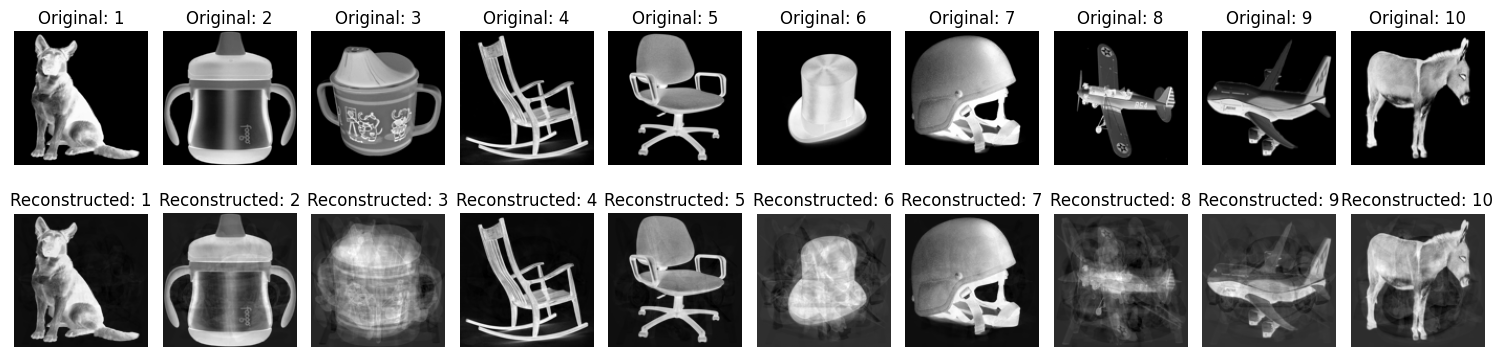

In [10]:
plt.figure(figsize = (15, 4))

for i in range(10):
  # Original Realistic Images on the top row
  plt.subplot(2, 10, i+1)
  # Show the original realistic image
  plt.imshow(images[i], cmap = 'binary')
  plt.axis('off')
  plt.title(f'Original: {i+1}')

  #Reconstructed Realistic Images on the bottom row
  plt.subplot(2, 10, i+11)
  # Show the reconstructed realistic image
  plt.imshow(X_reconstructed[i], cmap = 'binary')
  plt.axis('off')
  plt.title(f'Reconstructed: {i+1}')

plt.tight_layout()

**3. Each of the images belongs to one of eight clusters (Airplane, Car, Chair, Cup, Dog, Donkey, Duck, Hat). The clusters is indicated by the image name. We will now try to see if the visualization can help us identify different clusters.**

**A. For each condition (folder) use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components for each condition? [3 points].**

In [11]:
def import_images_with_names(folder_path):
  '''Import images in folder_path and store their filenames in filenames'''

  image_size = (128, 128) #Resize images to all be the same dimension, PCA doesn't work otherwise
  images = []
  filenames = []

  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert("L")   # convert image to grayscale
    img = img.resize(image_size)
    images.append(np.array(img))
    filenames.append(filename)

  images = np.array(images)


  X = images.reshape(len(images), -1) #Flatten images to 2d
  #Ex: 42 images x 16384 pixels for each iamges
  return X, filenames

In [12]:
X_blurred, blurred_filenames = import_images_with_names('/content/drive/MyDrive/image_files/v0/blurred')

# Keep first 2 principal components
pca = PCA(n_components = 2)
X_pca_blurred = pca.fit_transform(X_blurred)

# Amount of Variance kept by the first two principal components
print(f'{sum(pca.explained_variance_ratio_):.2%}', 'of the variance is explained by the first two prinncipal components for the Blurred images.')

49.86% of the variance is explained by the first two prinncipal components for the Blurred images.


In [13]:
X_features, features_filenames = import_images_with_names('/content/drive/MyDrive/image_files/v0/features')

# Keep first 2 principal components
pca = PCA(n_components = 2)
X_pca_features = pca.fit_transform(X_features)

# Amount of Variance kept by the first two principal components
print(f'{sum(pca.explained_variance_ratio_):.2%}', 'of the variance is explained by the first two prinncipal components for the Features images.')

21.75% of the variance is explained by the first two prinncipal components for the Features images.


In [14]:
X_geons, geons_filenames = import_images_with_names('/content/drive/MyDrive/image_files/v0/geons')

# Keep first 2 principal components
pca = PCA(n_components = 2)
X_pca_geons = pca.fit_transform(X_geons)

# Amount of Variance kept by the first two principal components
print(f'{sum(pca.explained_variance_ratio_):.2%}', 'of the variance is explained by the first two prinncipal components for the Geons images.')

34.80% of the variance is explained by the first two prinncipal components for the Geons images.


In [15]:
X_realistic, realistic_filenames = import_images_with_names('/content/drive/MyDrive/image_files/v0/realistic')

# Keep first 2 principal components
pca = PCA(n_components = 2)
X_pca_realistic = pca.fit_transform(X_realistic)

# Amount of Variance kept by the first two principal components
print(f'{sum(pca.explained_variance_ratio_):.2%}', 'of the variance is explained by the first two prinncipal components for the Realistic images.')

28.59% of the variance is explained by the first two prinncipal components for the Realistic images.


In [16]:
X_silhouettes, silhouettes_filenames = import_images_with_names('/content/drive/MyDrive/image_files/v0/silhouettes')

# Keep first 2 principal components
pca = PCA(n_components = 2)
X_pca_silhouettes = pca.fit_transform(X_silhouettes)

# Amount of Variance kept by the first two principal components
print(f'{sum(pca.explained_variance_ratio_):.2%}', 'of the variance is explained by the first two prinncipal components for the Silhouettes images.')

31.46% of the variance is explained by the first two prinncipal components for the Silhouettes images.


The following variance is explained for each condition by only keeping the first two principal components for that condition:

*   Blurred: 49.86%
*   Features: 21.75%
*   Geons: 34.80%
*   Realistic: 28.59%
*   Silhouettes: 31.46%

**B. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image class (so you will have eight different colors). Repeat the process and create the same type of plots for t-SNE, LLE and UMAP. [6 points]**

In [17]:
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
import umap

def assign_file_types(filenames):
  '''Assigns image type based on filename.'''

  #list of different types of images
  image_types = ['airplane', 'car', 'chair', 'cup', 'dog', 'donkey', 'duck', 'hat']
  file_type = []

  # Iterate through list of filenames
  for filename in filenames:
    # Iterate through the possible types of images
    for image_type in image_types:
      # If the file has the image type in it's name, it's that type of file
      if image_type in filename.lower():
        file_type.append(image_type)
        break
    else:
        #There's a typo in a few of the filenames, so using this to address the issue
        if filename == 'ChariThreeQuarters_V4.jpg':
          file_type.append('chair')
        elif filename == 'page 8-3.jpg':
          file_type.append('donkey')
        else:
          # If no break occurred, append "other"
          file_type.append("other")

    # print(file_type[-1], filename)

  return file_type

In [18]:
def create_dimensionality_df(X, filetypes):
  '''Returns df with first two principal components for PCA, TSNE, LLE, and UMAP along with file type
  for image (car, chair, cup, etc...)'''
  #Put everything into a df
  pca = PCA(n_components = 2)
  X_pca= pca.fit_transform(X)
  dimensionality_df = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])

  # Apply t-SNE to X
  tsne = TSNE(n_components=2, random_state=42) # Set random_state for reproducibility
  X_tsne = tsne.fit_transform(X)
  #Add it to the df
  dimensionality_df['TSNE1'] = X_tsne[:, 0]
  dimensionality_df['TSNE2'] = X_tsne[:, 1]

  # Apply LLE to X
  lle = LocallyLinearEmbedding(n_components=2, random_state=42)
  X_lle = lle.fit_transform(X)
  #Add it to the df
  dimensionality_df['LLE1'] = X_lle[:, 0]
  dimensionality_df['LLE2'] = X_lle[:, 1]

  # Apply UMAP to X
  reducer = umap.UMAP(n_components=2, random_state=42)
  X_umap = reducer.fit_transform(X)
  #Add it to the df
  dimensionality_df['UMAP1'] = X_umap[:, 0]
  dimensionality_df['UMAP2'] = X_umap[:, 1]

  dimensionality_df['file_type'] = filetypes

  return dimensionality_df

In [19]:
#Blurred Images

#map filename to filetype
blurred_file_types = assign_file_types(blurred_filenames)
#create df that has only 2 components for each dimensionality reduction techinque and includes filetype
blurred_df = create_dimensionality_df(X_blurred, blurred_file_types)
blurred_df.head()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,PC1,PC2,TSNE1,TSNE2,LLE1,LLE2,UMAP1,UMAP2,file_type
0,-5498.656530,1130.077987,0.869325,-1.116367,0.137026,-0.088265,5.652993,-0.424086,car
1,3682.296083,424.584455,-1.547773,0.481292,-0.093075,-0.001288,4.374917,-4.508143,airplane
2,-996.008294,-4655.276448,0.417781,0.980453,-0.091006,0.234655,3.571624,-2.795479,cup
3,-1974.930024,-3647.748477,1.018528,0.470907,-0.044295,0.028941,3.205283,-2.368819,dog
4,-746.087620,1969.576397,-0.430686,-0.529828,-0.090808,-0.287126,6.405776,-2.278481,duck


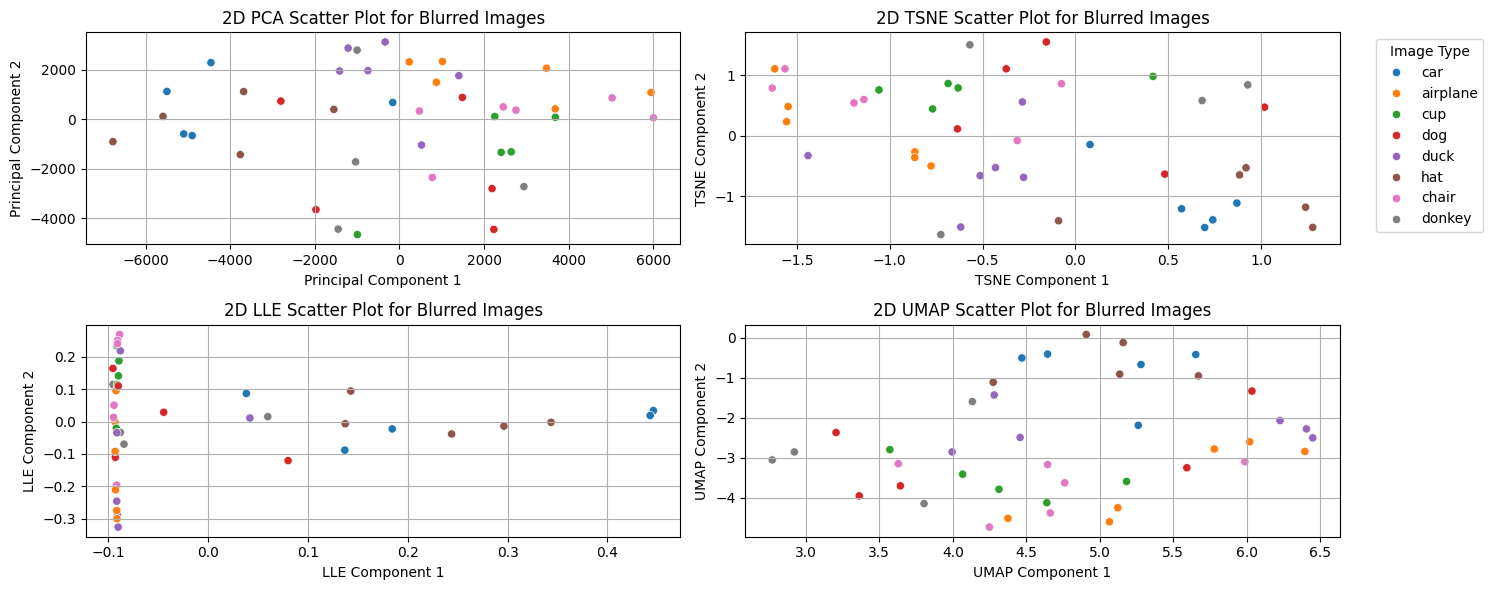

In [20]:
# Scatterplots created with help of ChatGPT

#Scatterplots for Blurred Images
plt.figure(figsize=(15, 6))

#PCA subplot
plt.subplot(2, 2, 1)
sns.scatterplot(data=blurred_df, x='PC1', y='PC2', hue='file_type', legend = False)
plt.title('2D PCA Scatter Plot for Blurred Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

#TSNE subplot
plt.subplot(2, 2, 2)
sns.scatterplot(data=blurred_df, x='TSNE1', y='TSNE2', hue='file_type')
plt.title('2D TSNE Scatter Plot for Blurred Images')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Image Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

#LLE subplot
plt.subplot(2, 2, 3)
sns.scatterplot(data=blurred_df, x='LLE1', y='LLE2', hue='file_type', legend = False)
plt.title('2D LLE Scatter Plot for Blurred Images')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.grid(True)

#UMAP subplot
plt.subplot(2, 2, 4)
sns.scatterplot(data=blurred_df, x='UMAP1', y='UMAP2', hue='file_type', legend = False)
plt.title('2D UMAP Scatter Plot for Blurred Images')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
#Features Images

#map filename to filetype
features_file_types = assign_file_types(features_filenames)
#create df that has only 2 components for each dimensionality reduction techinque and includes filetype
features_df = create_dimensionality_df(X_features, features_file_types)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


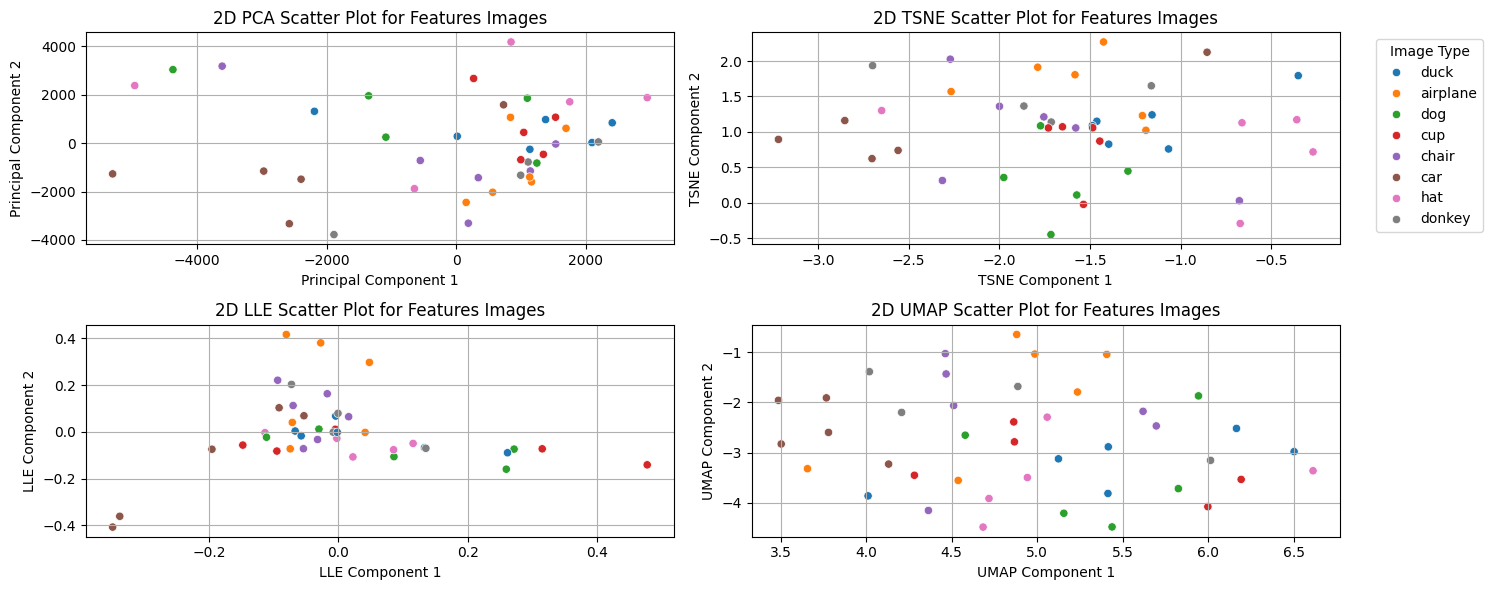

In [22]:
#Scatterplots for Features Images
plt.figure(figsize=(15, 6))

#PCA subplot
plt.subplot(2, 2, 1)
sns.scatterplot(data=features_df, x='PC1', y='PC2', hue='file_type', legend = False)
plt.title('2D PCA Scatter Plot for Features Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

#TSNE subplot
plt.subplot(2, 2, 2)
sns.scatterplot(data=features_df, x='TSNE1', y='TSNE2', hue='file_type')
plt.title('2D TSNE Scatter Plot for Features Images')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Image Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

#LLE subplot
plt.subplot(2, 2, 3)
sns.scatterplot(data=features_df, x='LLE1', y='LLE2', hue='file_type', legend = False)
plt.title('2D LLE Scatter Plot for Features Images')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.grid(True)

#UMAP subplot
plt.subplot(2, 2, 4)
sns.scatterplot(data=features_df, x='UMAP1', y='UMAP2', hue='file_type', legend = False)
plt.title('2D UMAP Scatter Plot for Features Images')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
#Geons Images

#map filename to filetype
geons_file_types = assign_file_types(geons_filenames)
#create df that has only 2 components for each dimensionality reduction techinque and includes filetype
geons_df = create_dimensionality_df(X_geons, geons_file_types)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


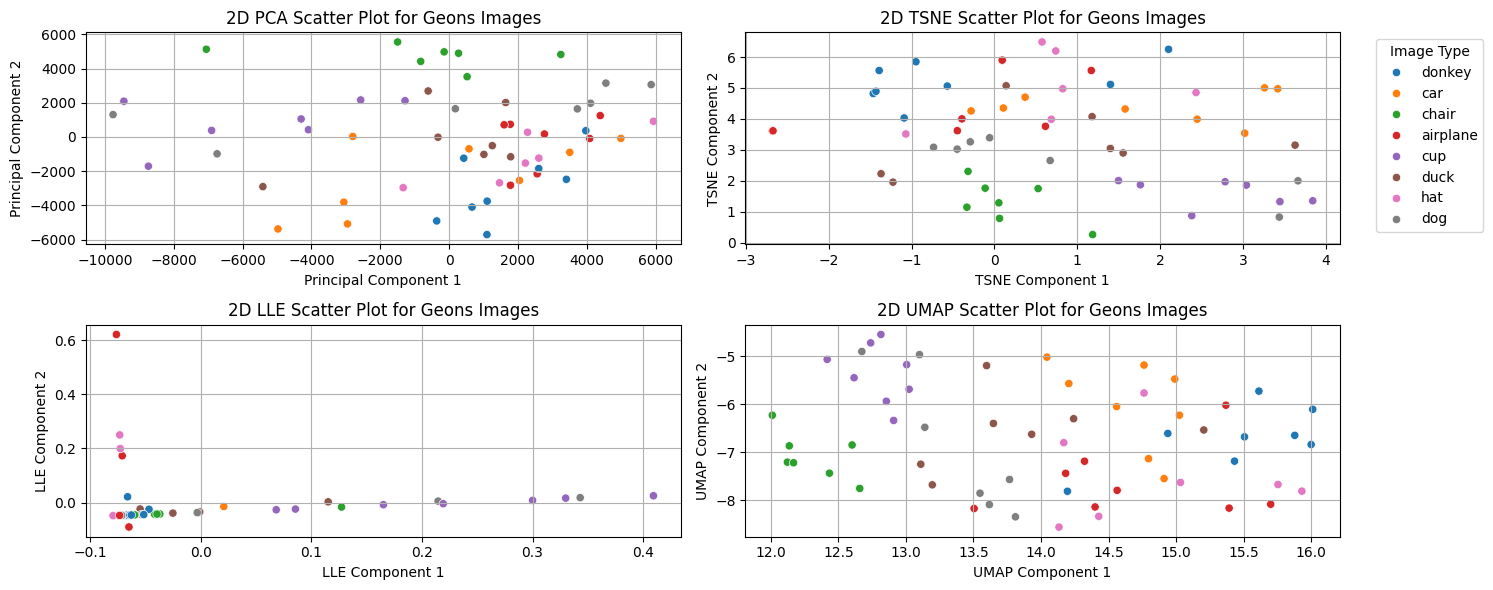

In [24]:
#Scatterplots for Geons Images
plt.figure(figsize=(15, 6))

#PCA subplot
plt.subplot(2, 2, 1)
sns.scatterplot(data=geons_df, x='PC1', y='PC2', hue='file_type', legend = False)
plt.title('2D PCA Scatter Plot for Geons Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

#TSNE subplot
plt.subplot(2, 2, 2)
sns.scatterplot(data=geons_df, x='TSNE1', y='TSNE2', hue='file_type')
plt.title('2D TSNE Scatter Plot for Geons Images')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Image Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

#LLE subplot
plt.subplot(2, 2, 3)
sns.scatterplot(data=geons_df, x='LLE1', y='LLE2', hue='file_type', legend = False)
plt.title('2D LLE Scatter Plot for Geons Images')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.grid(True)

#UMAP subplot
plt.subplot(2, 2, 4)
sns.scatterplot(data=geons_df, x='UMAP1', y='UMAP2', hue='file_type', legend = False)
plt.title('2D UMAP Scatter Plot for Geons Images')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
#Realistic Images

#map filename to filetype
realistic_file_types = assign_file_types(realistic_filenames)
#create df that has only 2 components for each dimensionality reduction techinque and includes filetype
realistic_df = create_dimensionality_df(X_realistic, realistic_file_types)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


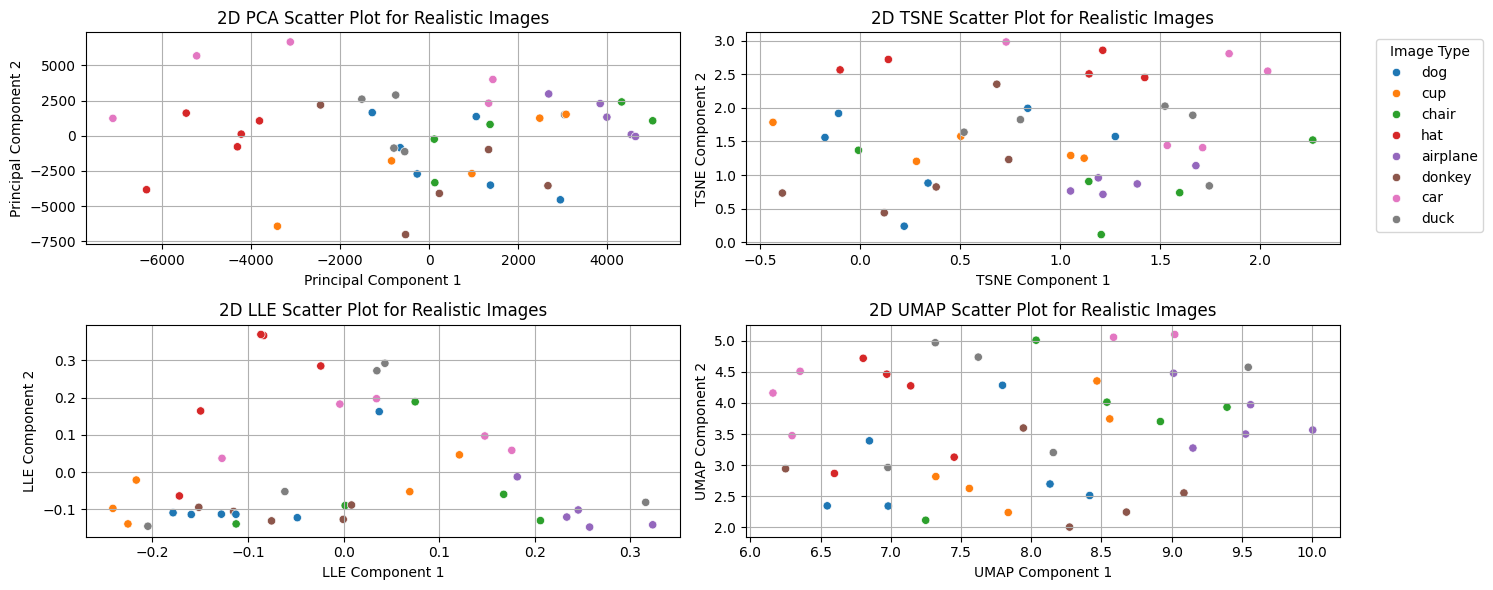

In [26]:
#Scatterplots for Realistic Images
plt.figure(figsize=(15, 6))

#PCA subplot
plt.subplot(2, 2, 1)
sns.scatterplot(data=realistic_df, x='PC1', y='PC2', hue='file_type', legend = False)
plt.title('2D PCA Scatter Plot for Realistic Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

#TSNE subplot
plt.subplot(2, 2, 2)
sns.scatterplot(data=realistic_df, x='TSNE1', y='TSNE2', hue='file_type')
plt.title('2D TSNE Scatter Plot for Realistic Images')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Image Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

#LLE subplot
plt.subplot(2, 2, 3)
sns.scatterplot(data=realistic_df, x='LLE1', y='LLE2', hue='file_type', legend = False)
plt.title('2D LLE Scatter Plot for Realistic Images')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.grid(True)

#UMAP subplot
plt.subplot(2, 2, 4)
sns.scatterplot(data=realistic_df, x='UMAP1', y='UMAP2', hue='file_type', legend = False)
plt.title('2D UMAP Scatter Plot for Realistic Images')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
#Silhouettes Images

#map filename to filetype
silhouettes_file_types = assign_file_types(silhouettes_filenames)
#create df that has only 2 components for each dimensionality reduction techinque and includes filetype
silhouettes_df = create_dimensionality_df(X_silhouettes, silhouettes_file_types)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


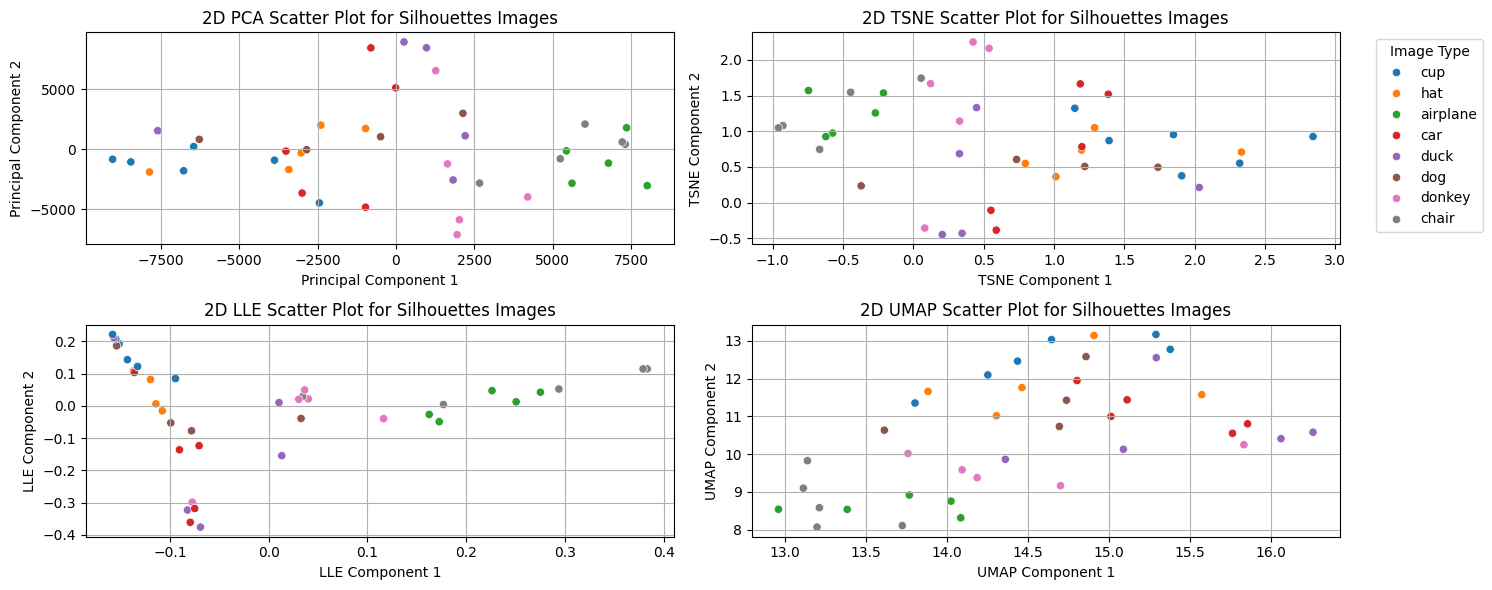

In [28]:
#Scatterplots for Silhouettes Images
plt.figure(figsize=(15, 6))

#PCA subplot
plt.subplot(2, 2, 1)
sns.scatterplot(data=silhouettes_df, x='PC1', y='PC2', hue='file_type', legend = False)
plt.title('2D PCA Scatter Plot for Silhouettes Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

#TSNE subplot
plt.subplot(2, 2, 2)
sns.scatterplot(data=silhouettes_df, x='TSNE1', y='TSNE2', hue='file_type')
plt.title('2D TSNE Scatter Plot for Silhouettes Images')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Image Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

#LLE subplot
plt.subplot(2, 2, 3)
sns.scatterplot(data=silhouettes_df, x='LLE1', y='LLE2', hue='file_type', legend = False)
plt.title('2D LLE Scatter Plot for Silhouettes Images')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.grid(True)

#UMAP subplot
plt.subplot(2, 2, 4)
sns.scatterplot(data=silhouettes_df, x='UMAP1', y='UMAP2', hue='file_type', legend = False)
plt.title('2D UMAP Scatter Plot for Silhouettes Images')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

**4. Cluster the images in each condition using K-Means (apply K-means separately to images from each folder).**

**A. To make the process faster, reduce the dimensionality using PCA, but keep at least 95% of the variance. Determine the number of clusters using one of the techniques we discussed in class, suitable for the K-means algorithm. [2 points]**

In [29]:
#Need to feature scaling for Kmeans to perform well
from sklearn.preprocessing import StandardScaler

# Standardize raw features
scaler1 = StandardScaler()
X_blurred_scaled = scaler1.fit_transform(X_blurred)
X_features_scaled = scaler1.fit_transform(X_features)
X_geons_scaled = scaler1.fit_transform(X_geons)
X_realistic_scaled = scaler1.fit_transform(X_realistic)
X_silhouettes_scaled = scaler1.fit_transform(X_silhouettes)

#Reduce variance to 95% using PCA for each condition
#Need to declare each PCA individually so I can inverse transform in part 5B.
pca_blurred = PCA(n_components = 0.95)
pca_features = PCA(n_components = 0.95)
pca_geons = PCA(n_components = 0.95)
pca_realistic = PCA(n_components = 0.95)
pca_silhouettes = PCA(n_components = 0.95)

X_pca_blurred = pca_blurred.fit_transform(X_blurred_scaled)
X_pca_features = pca_features.fit_transform(X_features_scaled)
X_pca_geons = pca_geons.fit_transform(X_geons_scaled)
X_pca_realistic = pca_realistic.fit_transform(X_realistic_scaled)
X_pca_silhouettes = pca_silhouettes.fit_transform(X_silhouettes_scaled)


#Number of dimensions kept for each condition (2nd number)
print(X_pca_blurred.shape)
print(X_pca_features.shape)
print(X_pca_geons.shape)
print(X_pca_realistic.shape)
print(X_pca_silhouettes.shape)

(42, 23)
(42, 32)
(60, 38)
(41, 30)
(40, 30)


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_sil_scores(X):
  silhouette_scores = []

  for i in range(2, 13):
    #Initialize KMeans using i number of clusters
    kmeans = KMeans(n_clusters = i, n_init = 20, random_state = 42)
    #Predict the cluster for each instance
    cluster_labels = kmeans.fit_predict(X)
    #Calculate the silhouette score
    current_silhouette_score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(current_silhouette_score)
  return silhouette_scores

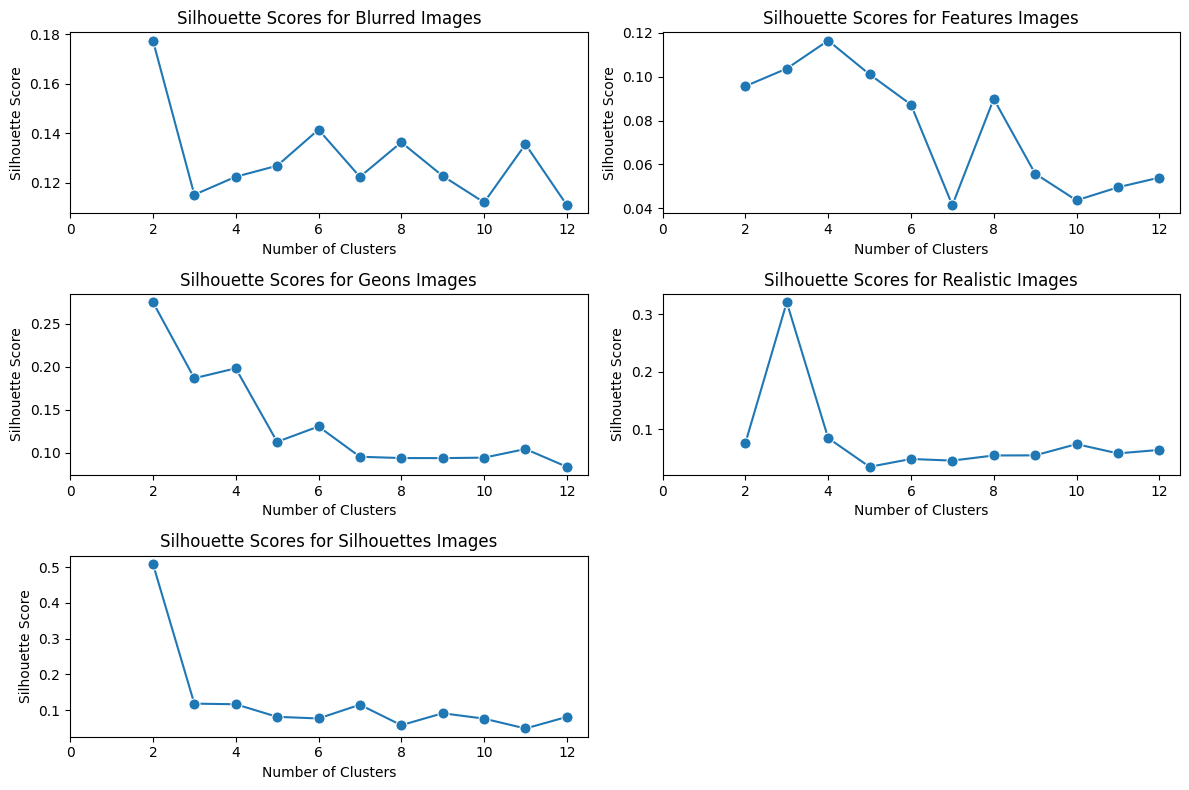

In [31]:
plt.figure(figsize = (12, 8))
clusters = list(range(2, 13))

#Blurred Images
plt.subplot(3, 2, 1)
#Number of clusters on x-axis, silhouette score for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_sil_scores(X_pca_blurred), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Blurred Images')
plt.xticks(np.arange(0, 13, 2));

#Features Images
plt.subplot(3, 2, 2)
#Number of clusters on x-axis, silhouette score for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_sil_scores(X_pca_features), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Features Images')
plt.xticks(np.arange(0, 13, 2));

#Geons Images
plt.subplot(3, 2, 3)
#Number of clusters on x-axis, silhouette score for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_sil_scores(X_pca_geons), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Geons Images')
plt.xticks(np.arange(0, 13, 2));

#Realistic Images
plt.subplot(3, 2, 4)
#Number of clusters on x-axis, silhouette score for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_sil_scores(X_pca_realistic), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Realistic Images')
plt.xticks(np.arange(0, 13, 2));

#Silhouettes Images
plt.subplot(3, 2, 5)
#Number of clusters on x-axis, silhouette score for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_sil_scores(X_pca_silhouettes), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Silhouettes Images')
plt.xticks(np.arange(0, 13, 2));

plt.tight_layout()

Optimal Number of Clusters for each Condition Based on the Highest Silhouette Score (though none of the Silhouette Scores are very high for any of the clusters):

*   Blurred: 2
*   Features: 4
*   Geons: 2
*   Realistic: 3
*   Silhouette: 2

**B. Set the number of clusters to 8 (ground truth), report clustering accuracy (choose an appropriate mapping) and show a confusion matrix. [3 points]**

In [32]:
#Mapping of file type to discrete integer
file_type_to_int_dict = {"airplane": 0, "car": 1, "cup": 2, "dog":3, "hat":4, "donkey":5, "duck":6, "chair":7}
# Reverse mapping of discrete integers to file type
file_type_int_to_string_dict = {0:'airplane', 1:'car', 2:'cup', 3:'dog', 4:'hat', 5:'donkey', 6:'duck', 7:'chair'}

In [33]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

#Done with help of ChatGPT
def get_optimized_confusion_matrix(y_true, y_pred):
    """
    Computes clustering accuracy and returns components for visualization,
    assuming y_true and y_pred are numerical arrays.
    """
    # 1. Create the Contingency Matrix
    C = confusion_matrix(y_true, y_pred)

    # 2. Apply the Hungarian Algorithm
    # col_ind contains the optimal predicted cluster index for each true label row_ind
    row_ind, col_ind = linear_sum_assignment(C.max() - C)

    # 3. Calculate Accuracy
    accuracy = C[row_ind, col_ind].sum() / y_true.size

    # 4. Generate Class Names (based on unique values in y_true)
    unique_classes = np.unique(y_true)
    true_labels = [f"{file_type_int_to_string_dict[i]}" for i in unique_classes]

    # Return the accuracy, initial matrix, true label names, and the optimal mapping
    return accuracy, C, true_labels, col_ind

Clustering Accuracy for Blurred Images: 40.48%


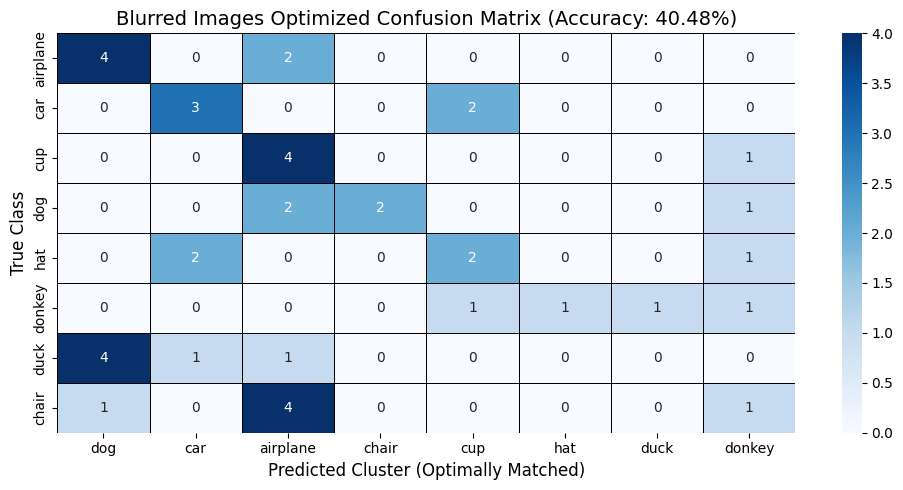

In [34]:
#Blurred Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_pca_blurred)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
blurred_file_types_int = [file_type_to_int_dict[file_type] for file_type in blurred_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(blurred_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Blurred Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Blurred Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Features Images: 26.19%


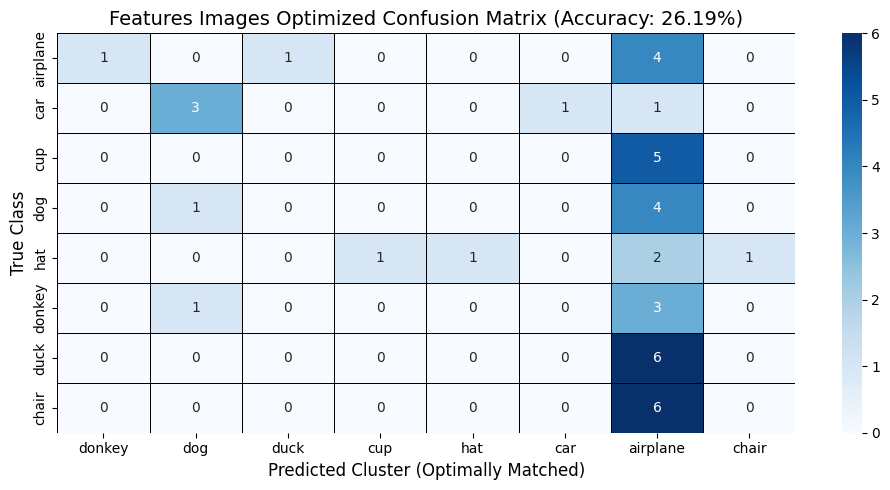

In [35]:
#Features Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_pca_features)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
features_file_types_int = [file_type_to_int_dict[file_type] for file_type in features_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(features_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Features Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Features Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Geons Images: 43.33%


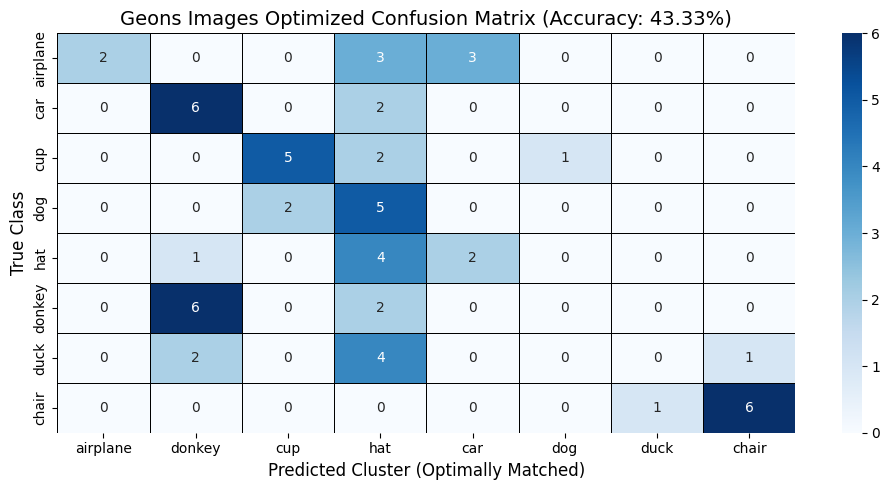

In [36]:
#Geons Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_pca_geons)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
geons_file_types_int = [file_type_to_int_dict[file_type] for file_type in geons_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(geons_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Geons Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Geons Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Realistic Images: 41.46%


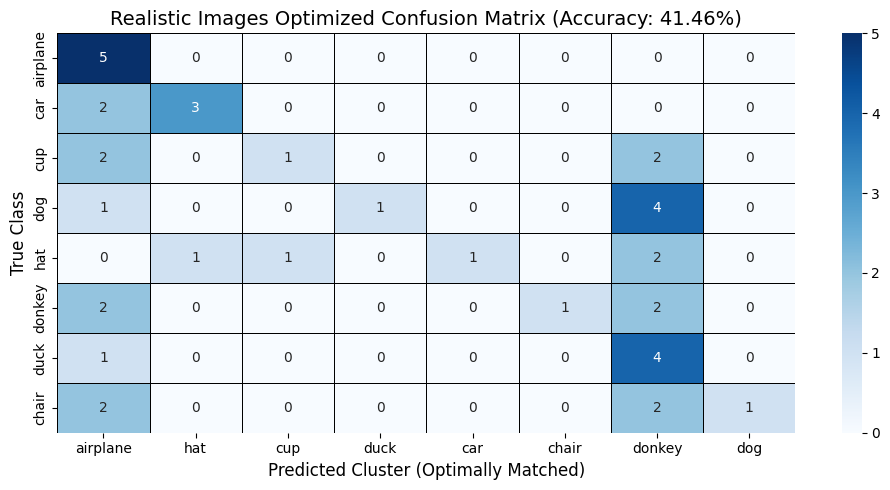

In [37]:
#Realistic Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_pca_realistic)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
realistic_file_types_int = [file_type_to_int_dict[file_type] for file_type in realistic_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(realistic_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Realistic Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Realistic Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Silhouettes Images: 40.00%


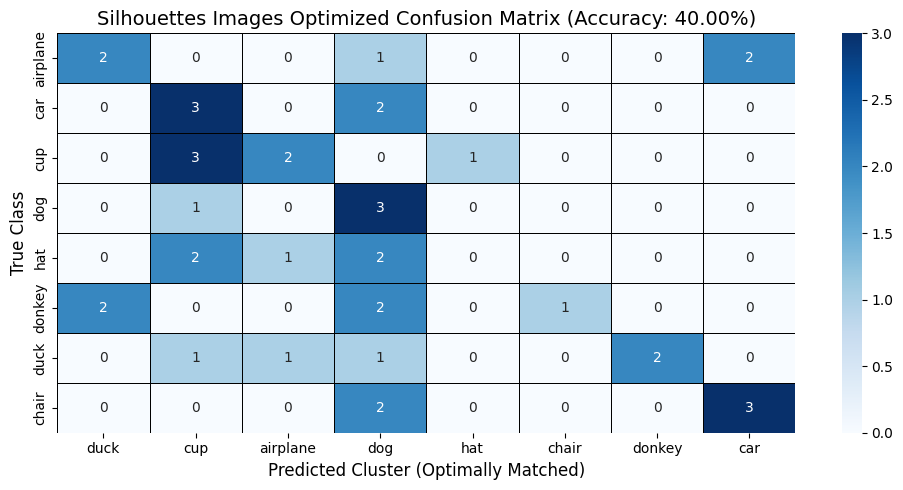

In [38]:
#Silhouettes Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_pca_silhouettes)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
silhouettes_file_types_int = [file_type_to_int_dict[file_type] for file_type in silhouettes_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(silhouettes_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Silhouettes Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Silhouettes Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

**C. Repeat step B, but instead of features derived using PCA, use features obtained with a pretrained ResNet model - use penultimate layer (size of the ResNet model and data used for pretraining are up to you; note that you will need to resize images to 224×224 for ResNet). [3 points]**

Gets features from penultimate layer of resnet18

In [39]:
import torch
import torch.nn as nn
from torchvision import models, transforms

#Load the model, trained on imagenet dataset
#Create with help of ChatGPT and resnet18 documentation: https://docs.pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Remove last classification layer to get penultimate features
feature_extractor = nn.Sequential(*list(resnet.children())[:-1])
#ensures that the extracted features are stable and deterministic, not noisy
feature_extractor.eval()

# For ImageNet
preprocess = transforms.Compose([
    transforms.Resize((224, 224)), #Resize to 224 by 224 - needed for Resnet18
    transforms.ToTensor(), #Convert to tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], #Resnet18 was trained using images normalized with this means and stdevs for RGB values
        std=[0.229, 0.224, 0.225]
    ),
])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 85.2MB/s]


In [40]:
def import_images_resnet(folder_path):
  #Imports images for resnet
  images = []
  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert("RGB")   # Resnet18 expects images to be in RGB format, not grayscale
    #Preprocess images
    img = preprocess(img)
    images.append(img)

  images = torch.stack(images)  # Stack into a single tensor of shape (N, C, H, W)
  print('Shape of images tensor:', images.shape)

  #Feed images into neural network and get penultimate layer features
  with torch.no_grad():  # Disable gradient computation (faster & less memory)
    features = feature_extractor(images)  # Output shape: (N, 512, 1, 1)

  #Flatten penultimate layer output
  features = features.view(features.size(0), -1)  # Shape: (N, 512)
  #Convert to numpy array for KMeans, doesn't work with tensor
  features = features.numpy()
  print('Shape of extracted features:', features.shape)
  return features

In [41]:
#Get features from penultimate layer of resnet18 trained on imagenet dataset (everyday objects and animals)
print('Blurred Images:')
X_blurred_resnet = import_images_resnet('/content/drive/MyDrive/image_files/v0/blurred')
print('Features Images')
X_features_resnet = import_images_resnet('/content/drive/MyDrive/image_files/v0/features')
print('Geons Images')
X_geons_resnet = import_images_resnet('/content/drive/MyDrive/image_files/v0/geons')
print('Realistic Images')
X_realistic_resnet = import_images_resnet('/content/drive/MyDrive/image_files/v0/realistic')
print('Silhouettes Images')
X_silhouettes_resnet = import_images_resnet('/content/drive/MyDrive/image_files/v0/silhouettes')

Blurred Images:
Shape of images tensor: torch.Size([42, 3, 224, 224])
Shape of extracted features: (42, 512)
Features Images
Shape of images tensor: torch.Size([42, 3, 224, 224])
Shape of extracted features: (42, 512)
Geons Images
Shape of images tensor: torch.Size([60, 3, 224, 224])
Shape of extracted features: (60, 512)
Realistic Images
Shape of images tensor: torch.Size([41, 3, 224, 224])
Shape of extracted features: (41, 512)
Silhouettes Images
Shape of images tensor: torch.Size([40, 3, 224, 224])
Shape of extracted features: (40, 512)


Use Resnet18 features for KMeans clustering

Clustering Accuracy for Blurred Images: 35.71%


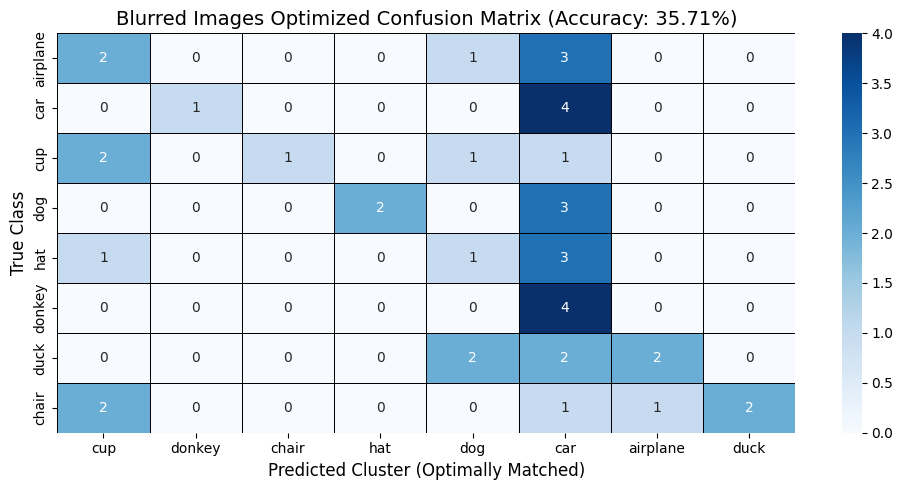

In [42]:
#Blurred Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_blurred_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
blurred_file_types_int = [file_type_to_int_dict[file_type] for file_type in blurred_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(blurred_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Blurred Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Blurred Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Features Images: 59.52%


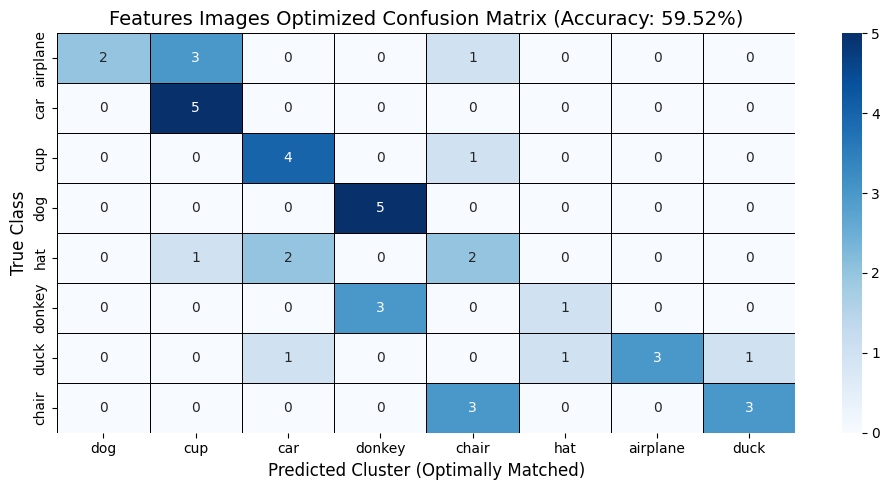

In [43]:
#Features Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_features_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
features_file_types_int = [file_type_to_int_dict[file_type] for file_type in features_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(features_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Features Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Features Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Geons Images: 85.00%


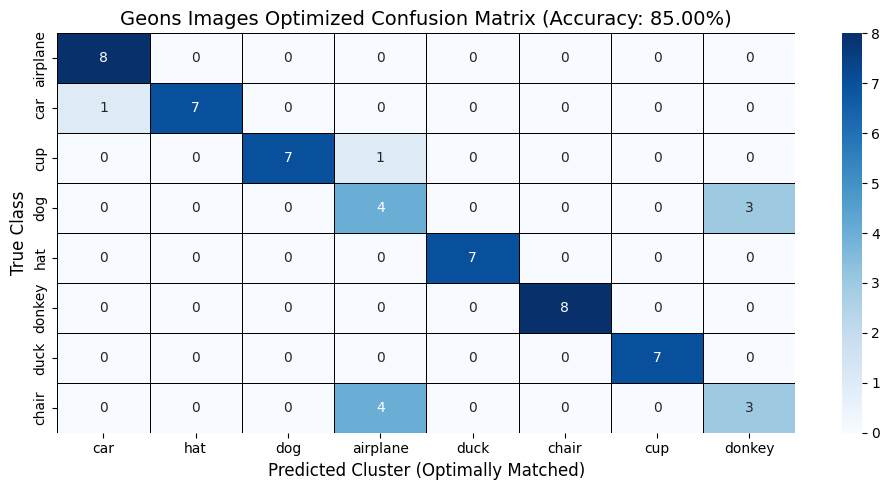

In [44]:
#Geons Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_geons_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
geons_file_types_int = [file_type_to_int_dict[file_type] for file_type in geons_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(geons_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Geons Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Geons Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Realistic Images: 75.61%


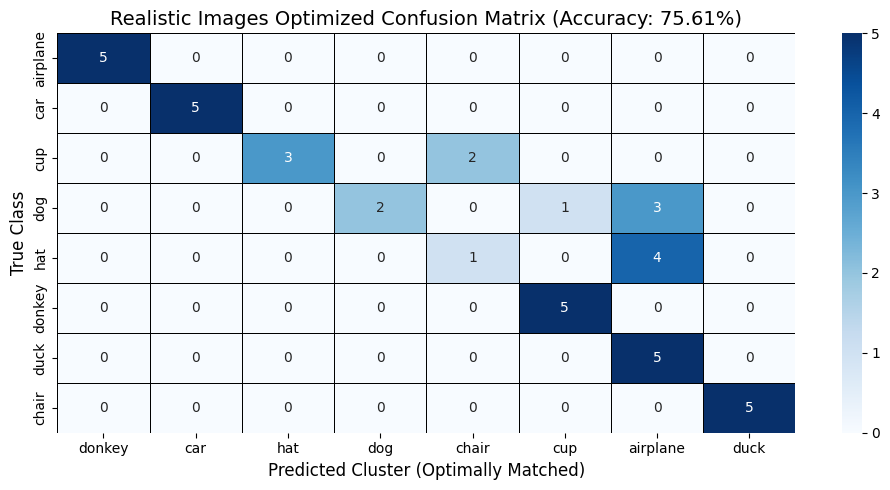

In [45]:
#Realistic Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_realistic_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
realistic_file_types_int = [file_type_to_int_dict[file_type] for file_type in realistic_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(realistic_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Realistic Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Realistic Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Silhouettes Images: 77.50%


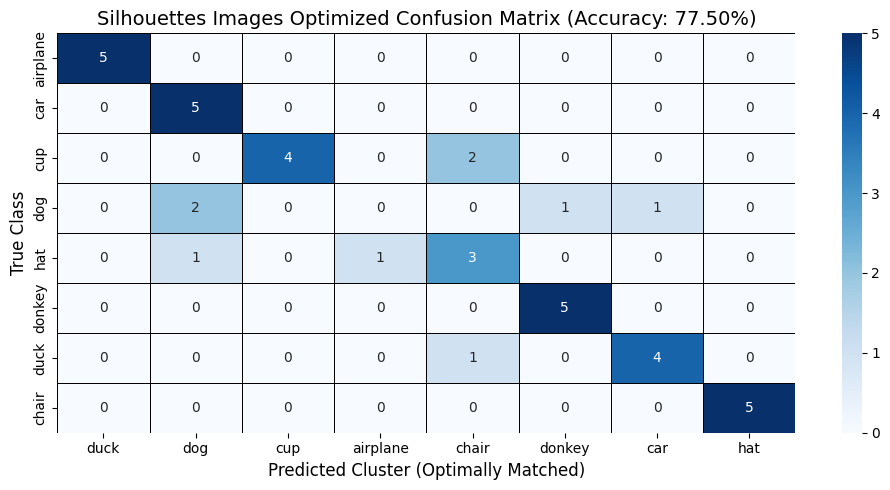

In [46]:
#Silhouettes Images

#Initialize 8 clusters with 95% variance PCA
kmeans = KMeans(n_clusters = 8, n_init = 20, random_state = 42)
kmeans.fit(X_silhouettes_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
silhouettes_file_types_int = [file_type_to_int_dict[file_type] for file_type in silhouettes_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(silhouettes_file_types_int), kmeans.labels_)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Silhouettes Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Silhouettes Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

The clustering using the penultimate layer features from resnet18 works significantly better for all the conditions except the blurred images.

**5. Cluster the in each condition using EM**

**A. Reduce again the dimensionality using PCA, but keep at least 95% of the variance. Determine the number of clusters using one of the techniques we discussed in class, suitable for the EM algorithm. [2 points]**

In [47]:
from sklearn.mixture import GaussianMixture

#Model with the lowest BIC has the appropriate number of clusters
def get_bic(X):
  #Get BIC's given number of clusters
  bic_list = []

  for i in range(2, 13):
    #Create Gaussian Mixture Model
    gm = GaussianMixture(n_components=i, n_init = 20, random_state=42).fit(X)
    bic_list.append(float(f'{gm.bic(X):.2f}'))
  return bic_list

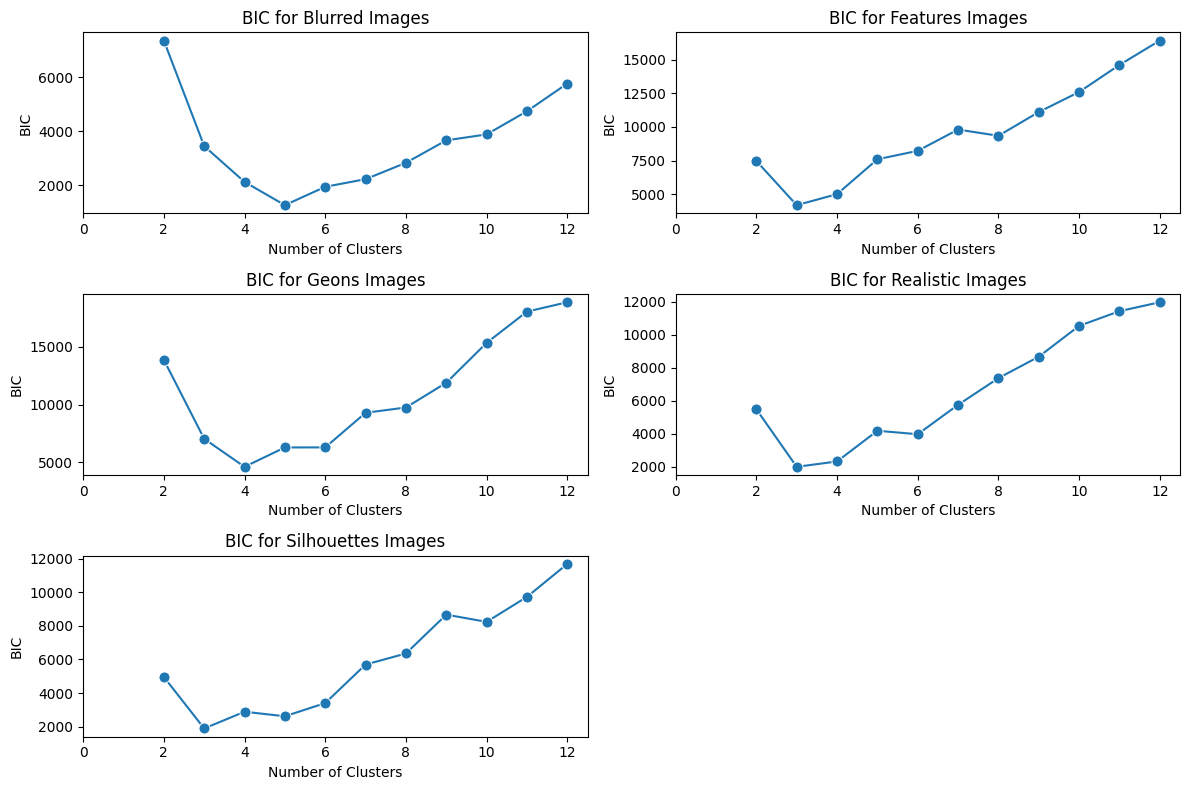

In [48]:
plt.figure(figsize = (12, 8))
clusters = list(range(2, 13))

#Blurred Images
plt.subplot(3, 2, 1)
#Number of clusters on x-axis, BIC for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_bic(X_pca_blurred), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Blurred Images')
plt.xticks(np.arange(0, 13, 2));

#Features Images
plt.subplot(3, 2, 2)
#Number of clusters on x-axis, BIC for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_bic(X_pca_features), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Features Images')
plt.xticks(np.arange(0, 13, 2));

#Geons Images
plt.subplot(3, 2, 3)
#Number of clusters on x-axis, BIC for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_bic(X_pca_geons), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Geons Images')
plt.xticks(np.arange(0, 13, 2));

#Realistic Images
plt.subplot(3, 2, 4)
#Number of clusters on x-axis, BIC for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_bic(X_pca_realistic), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Realistic Images')
plt.xticks(np.arange(0, 13, 2));

#Silhouettes Images
plt.subplot(3, 2, 5)
#Number of clusters on x-axis, BIC for that number of clusters on the y-axis
sns.lineplot(x= clusters , y= get_bic(X_pca_silhouettes), marker='o', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Silhouettes Images')
plt.xticks(np.arange(0, 13, 2));

plt.tight_layout()

Optimal Number of Clusters for each Condition Based on the lowest BIC:

*   Blurred: 5
*   Features: 3
*   Geons: 4
*   Realistic: 3
*   Silhouette: 3

**B. Set the number of clusters to 8 (ground truth), report clustering accuracy (choose an appropriate mapping) and show a confusion matrix. [3 points]**

Clustering Accuracy for Blurred Images: 42.86%


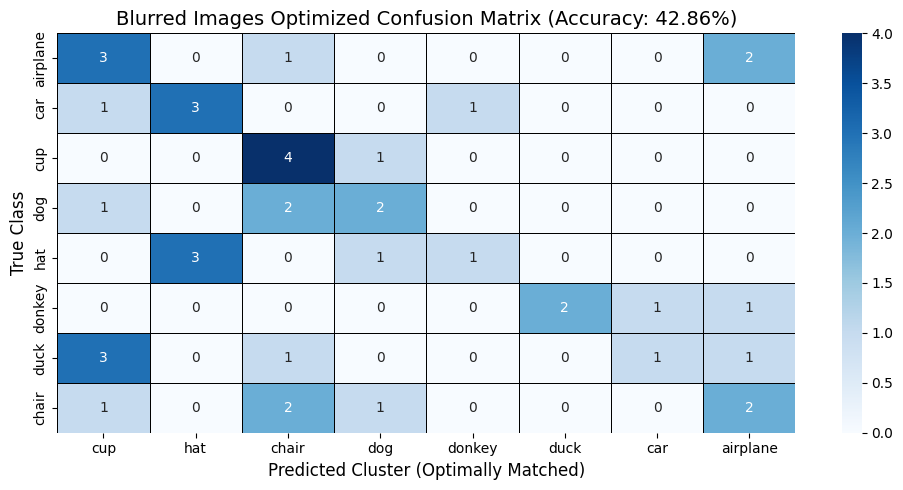

In [49]:
#Blurred Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_blurred)
gm_pred = gm.predict(X_pca_blurred)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
blurred_file_types_int = [file_type_to_int_dict[file_type] for file_type in blurred_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(blurred_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Blurred Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Blurred Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Features Images: 30.95%


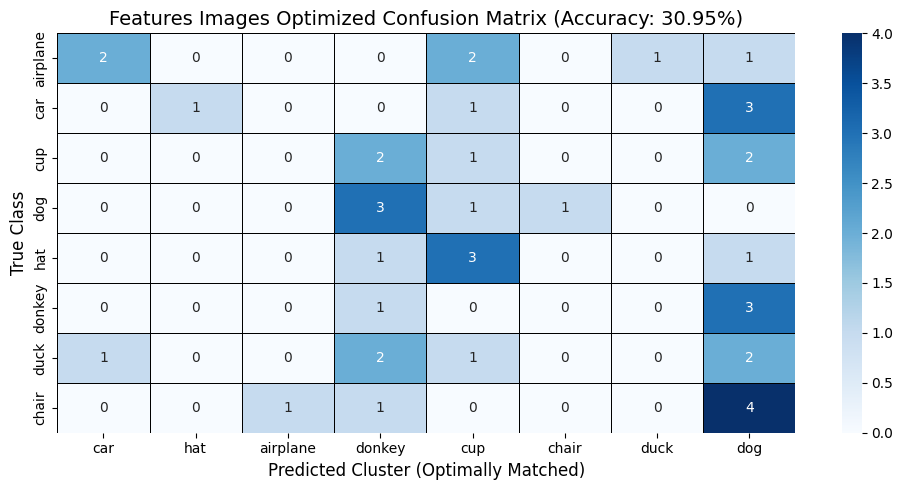

In [50]:
#Features Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_features)
gm_pred = gm.predict(X_pca_features)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
features_file_types_int = [file_type_to_int_dict[file_type] for file_type in features_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(features_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Features Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Features Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Geons Images: 51.67%


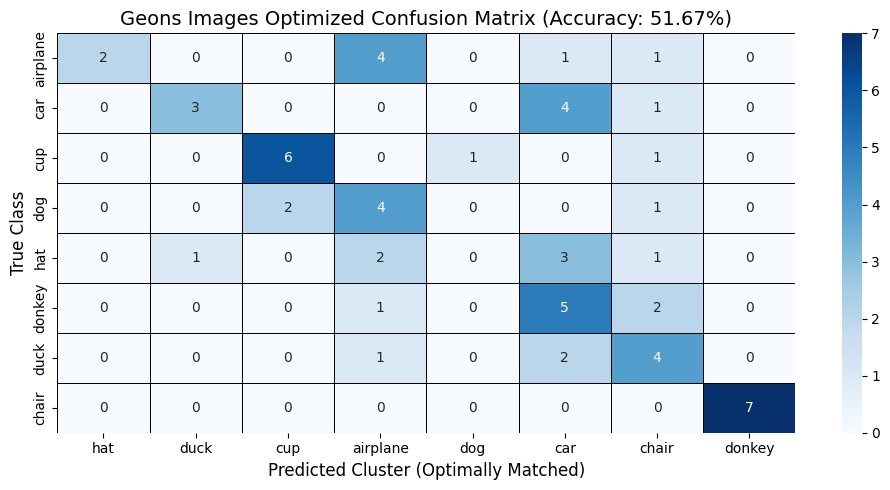

In [51]:
#Geons Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_geons)
gm_pred = gm.predict(X_pca_geons)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
geons_file_types_int = [file_type_to_int_dict[file_type] for file_type in geons_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(geons_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Geons Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Geons Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Realistic Images: 36.59%


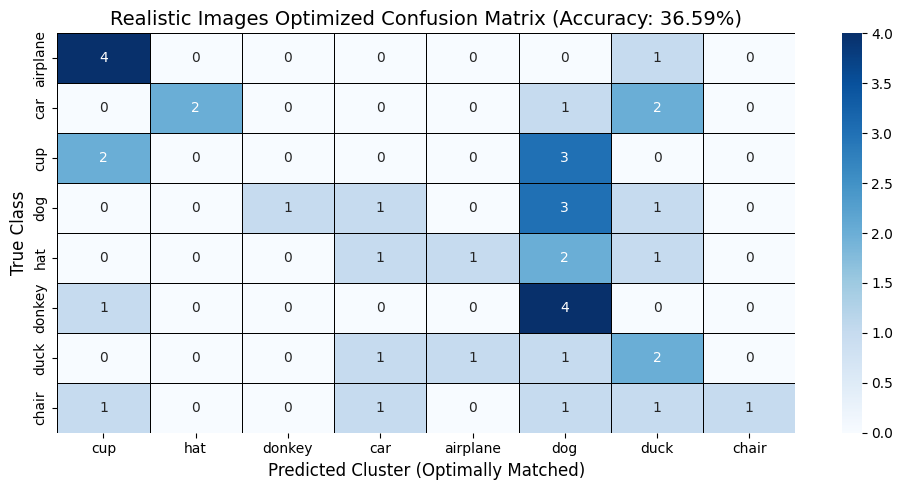

In [52]:
#Realistic Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_realistic)
gm_pred = gm.predict(X_pca_realistic)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
realistic_file_types_int = [file_type_to_int_dict[file_type] for file_type in realistic_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(realistic_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Realistic Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Realistic Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Silhouettes Images: 37.50%


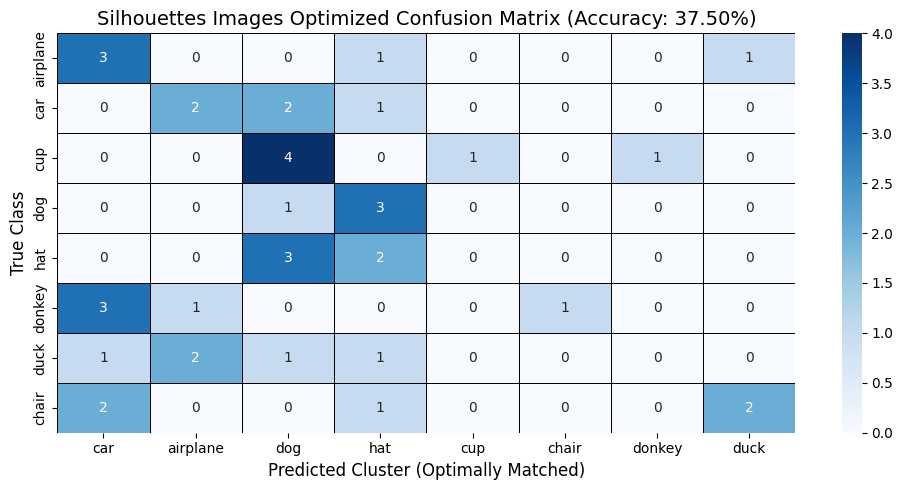

In [53]:
#Silhouettes Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_silhouettes)
gm_pred = gm.predict(X_pca_silhouettes)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
silhouettes_file_types_int = [file_type_to_int_dict[file_type] for file_type in silhouettes_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(silhouettes_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Silhouettes Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Silhouettes Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

**C. Use the model to generate 5 new images for each condition (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).  [4 points]**

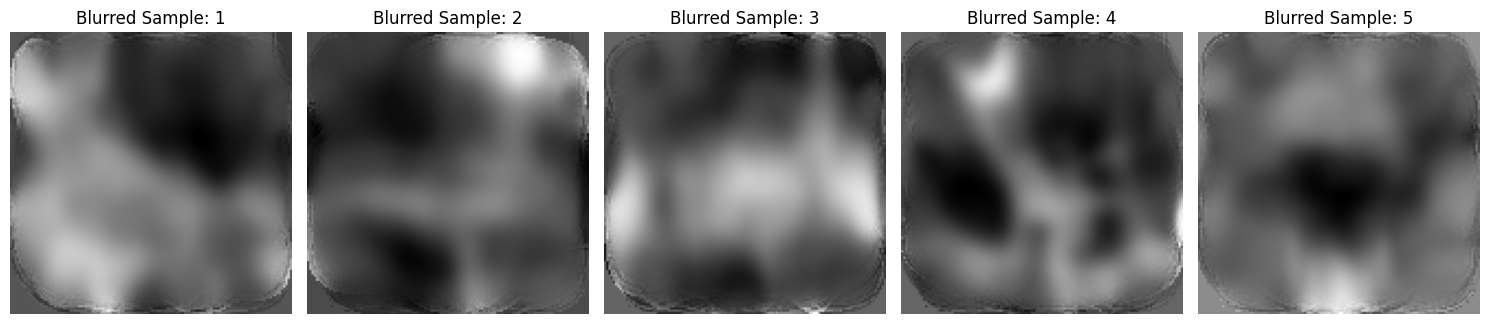

In [54]:
#Blurred images
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_blurred)

#Sample 5 blurred images
#Only need the first returned value of the tuple
X_pca_blurred_sample = gm.sample(5)[0]
#Inverse transform to get all pixels
X_blurred_sample_reconstructed = pca_blurred.inverse_transform(X_pca_blurred_sample)
#Reshape to 128 by 128 image/unflaten
X_reconstructed = X_blurred_sample_reconstructed.reshape(-1, 128, 128)

plt.figure(figsize = (15, 4))
for i, current_image in enumerate(X_reconstructed):
  plt.subplot(1, 5, i + 1)
  # Show the sampled and reconstructed image
  plt.imshow(current_image, cmap = 'binary')
  plt.axis('off')
  plt.title(f'Blurred Sample: {i+1}')

plt.tight_layout()

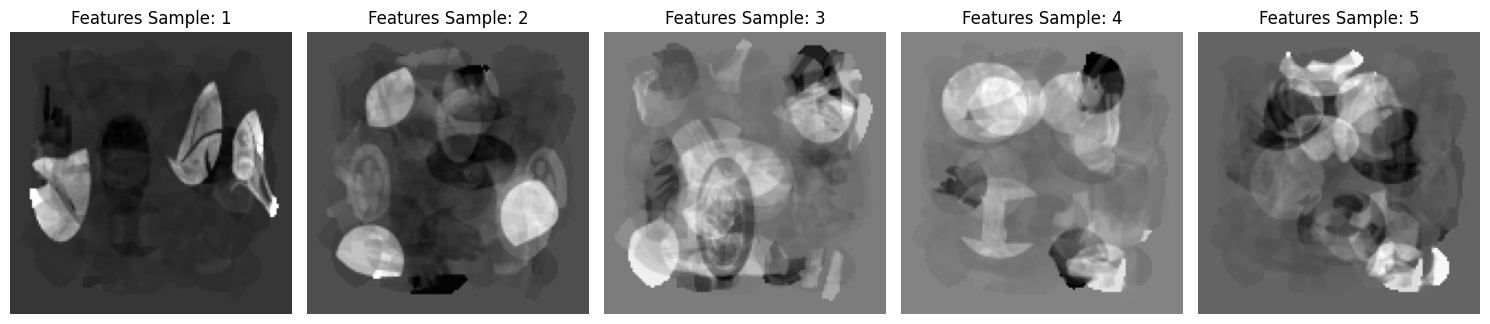

In [55]:
#Features images
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_features)

#Sample 5 features images
#Only need the first returned value of the tuple
X_pca_features_sample = gm.sample(5)[0]
#Inverse transform to get all pixels
X_features_sample_reconstructed = pca_features.inverse_transform(X_pca_features_sample)
#Reshape to 128 by 128 image/unflaten
X_reconstructed = X_features_sample_reconstructed.reshape(-1, 128, 128)

plt.figure(figsize = (15, 4))
for i, current_image in enumerate(X_reconstructed):
  plt.subplot(1, 5, i + 1)
  # Show the sampled and reconstructed image
  plt.imshow(current_image, cmap = 'binary')
  plt.axis('off')
  plt.title(f'Features Sample: {i+1}')

plt.tight_layout()

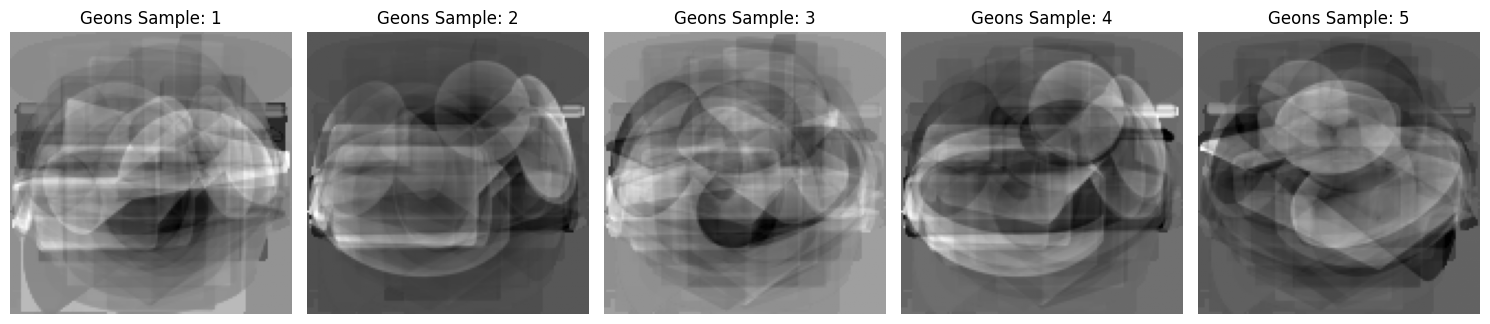

In [56]:
#Geons images
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_geons)

#Sample 5 geons images
#Only need the first returned value of the tuple
X_pca_geons_sample = gm.sample(5)[0]
#Inverse transform to get all pixels
X_geons_sample_reconstructed = pca_geons.inverse_transform(X_pca_geons_sample)
#Reshape to 128 by 128 image/unflaten
X_reconstructed = X_geons_sample_reconstructed.reshape(-1, 128, 128)

plt.figure(figsize = (15, 4))
for i, current_image in enumerate(X_reconstructed):
  plt.subplot(1, 5, i + 1)
  # Show the sampled and reconstructed image
  plt.imshow(current_image, cmap = 'binary')
  plt.axis('off')
  plt.title(f'Geons Sample: {i+1}')

plt.tight_layout()

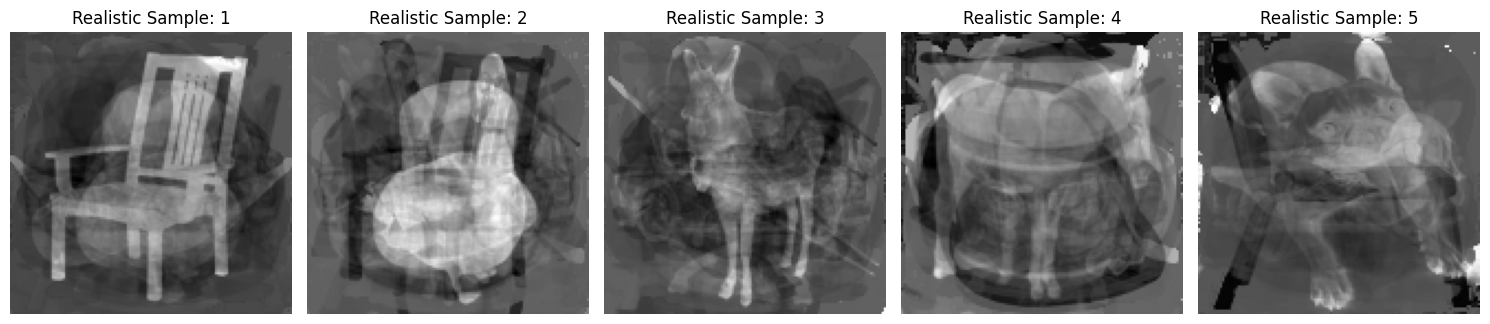

In [57]:
#Realistic images
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_realistic)

#Sample 5 realistic images
#Only need the first returned value of the tuple
X_pca_realistic_sample = gm.sample(5)[0]
#Inverse transform to get all pixels
X_realistic_sample_reconstructed = pca_realistic.inverse_transform(X_pca_realistic_sample)
#Reshape to 128 by 128 image/unflaten
X_reconstructed = X_realistic_sample_reconstructed.reshape(-1, 128, 128)

plt.figure(figsize = (15, 4))
for i, current_image in enumerate(X_reconstructed):
  plt.subplot(1, 5, i + 1)
  # Show the sampled and reconstructed image
  plt.imshow(current_image, cmap = 'binary')
  plt.axis('off')
  plt.title(f'Realistic Sample: {i+1}')

plt.tight_layout()

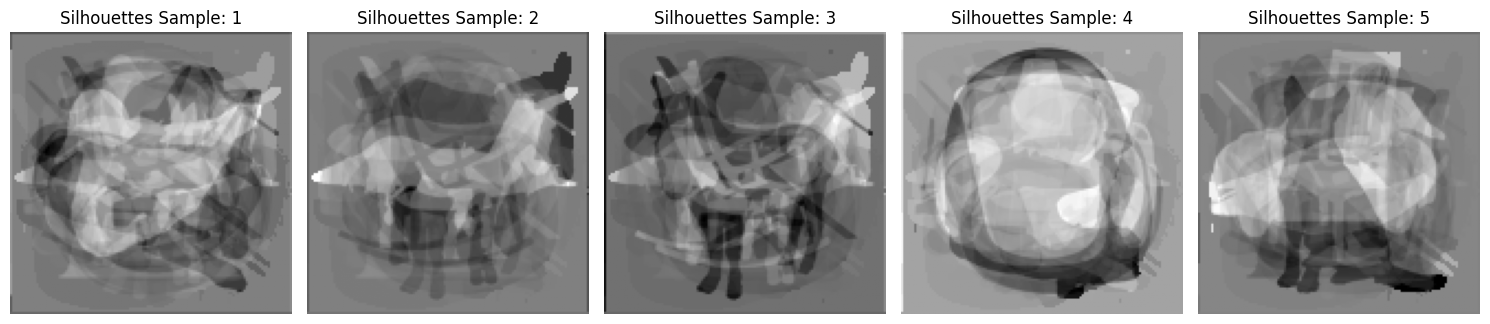

In [58]:
#Silhouettes images
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_pca_silhouettes)

#Sample 5 silhouettes images
#Only need the first returned value of the tuple
X_pca_silhouettes_sample = gm.sample(5)[0]
#Inverse transform to get all pixels
X_silhouettes_sample_reconstructed = pca_silhouettes.inverse_transform(X_pca_silhouettes_sample)
#Reshape to 128 by 128 image/unflaten
X_reconstructed = X_silhouettes_sample_reconstructed.reshape(-1, 128, 128)

plt.figure(figsize = (15, 4))
for i, current_image in enumerate(X_reconstructed):
  plt.subplot(1, 5, i + 1)
  # Show the sampled and reconstructed image
  plt.imshow(current_image, cmap = 'binary')
  plt.axis('off')
  plt.title(f'Silhouettes Sample: {i+1}')

plt.tight_layout()

**D. Repeat step B, but instead of features derived using PCA, use features obtained with a pretrained ResNet model. [3 points]**

Clustering Accuracy for Blurred Images: 45.24%


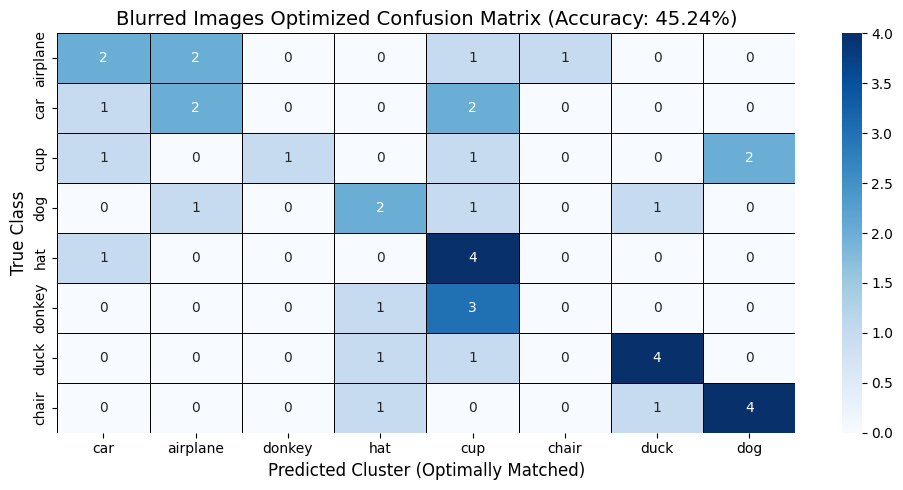

In [59]:
#Resnet preprocessing still saved

#Blurred Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_blurred_resnet)
gm_pred = gm.predict(X_blurred_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
blurred_file_types_int = [file_type_to_int_dict[file_type] for file_type in blurred_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(blurred_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Blurred Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Blurred Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Features Images: 71.43%


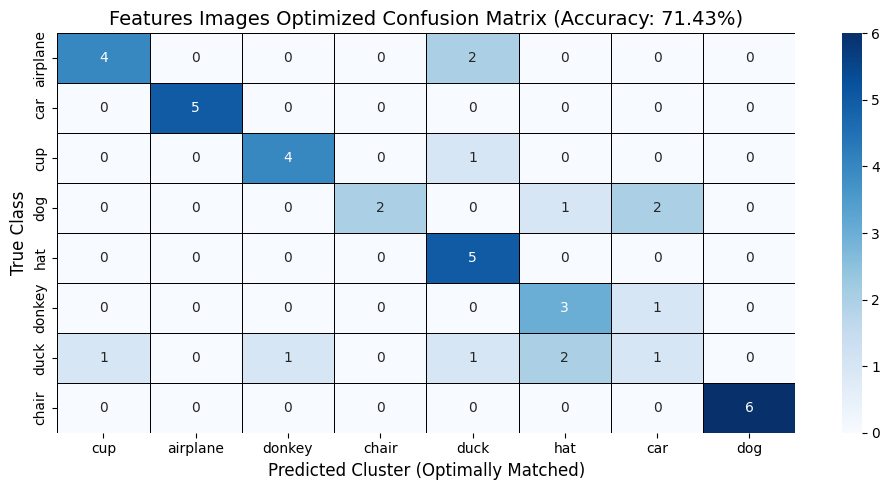

In [60]:
#Features Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_features_resnet)
gm_pred = gm.predict(X_features_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
features_file_types_int = [file_type_to_int_dict[file_type] for file_type in features_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(features_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Features Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Features Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Geons Images: 86.67%


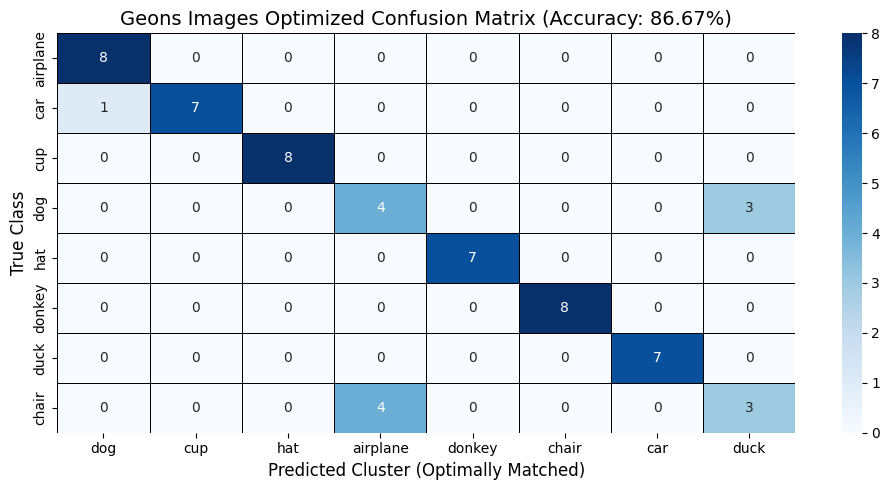

In [61]:
#Geons Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_geons_resnet)
gm_pred = gm.predict(X_geons_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
geons_file_types_int = [file_type_to_int_dict[file_type] for file_type in geons_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(geons_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Geons Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Geons Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Realistic Images: 78.05%


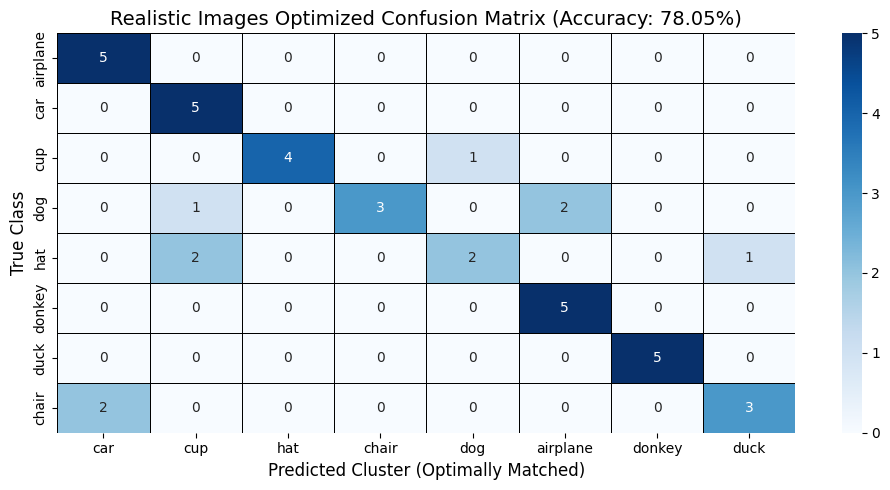

In [62]:
#Realistic Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_realistic_resnet)
gm_pred = gm.predict(X_realistic_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
realistic_file_types_int = [file_type_to_int_dict[file_type] for file_type in realistic_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(realistic_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Realistic Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Realistic Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

Clustering Accuracy for Silhouettes Images: 77.50%


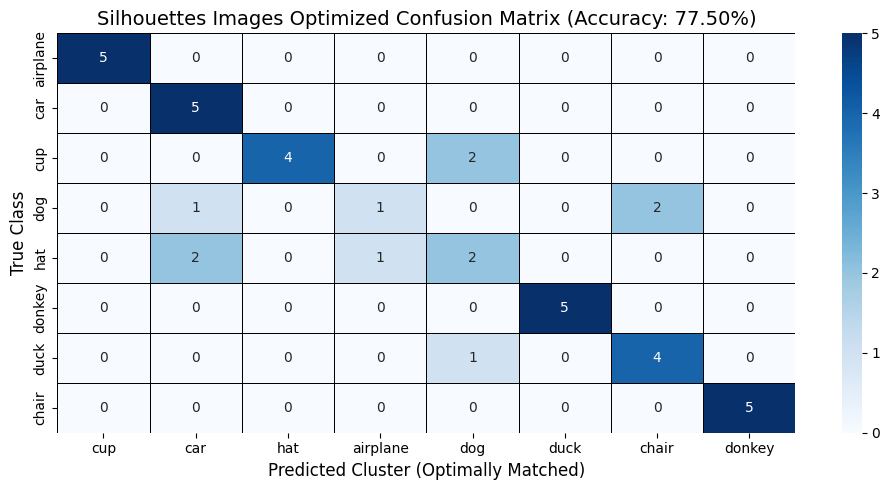

In [63]:
#Silhouettes Images

#Initialize 8 clusters with 95% variance PCA
gm = GaussianMixture(n_components = 8, n_init = 20, random_state = 42)
gm.fit(X_silhouettes_resnet)
gm_pred = gm.predict(X_silhouettes_resnet)

# Convert file types to discrete integers - Ex: "airplane" -> 0, "car" -> 1, etc...
silhouettes_file_types_int = [file_type_to_int_dict[file_type] for file_type in silhouettes_file_types]

#Find components for finding cluster accuracy using Hungarian Algorithm
accuracy, C_initial, true_labels, optimal_map = get_optimized_confusion_matrix(
    np.array(silhouettes_file_types_int), gm_pred)

# Re-order the columns in the way that maximizes accuracy according to Hungarian Algorithm
C_optimized = C_initial[:, optimal_map]

# Convert names from predicting cluster 0 to predicted cluster "airplane"
predicted_labels = [f"{file_type_int_to_string_dict[i]}" for i in optimal_map]

# 3. Create DataFrame for plotting
cm_df = pd.DataFrame(C_optimized, index=true_labels, columns=predicted_labels)
print(f"Clustering Accuracy for Silhouettes Images: {accuracy:.2%}")

# # --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f'Silhouettes Images Optimized Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14)
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Cluster (Optimally Matched)', fontsize=12)
plt.tight_layout()
plt.show() # In a notebook environment, this displays the plot

The clustering using the penultimate layer features from resnet18 works significantly better for all the conditions.

**6. Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify images into two categories: cars and ducks, using this dataset: https://osf.io/j2sfb/files/4enzwLinks to an external site. (use only images of cars and ducks to train the networks, 80% for training and 20% for validation; you can use data augmentation). Test the network on all images of ducks and cars (all conditions) from the dataset you used in earlier questions: https://osf.io/ba4g2. For your network, choose the number of neurons you find appropriate and efficient (so you have enough time to run it). Train the network for multiple epochs until it converges (if the process is too slow, tweak the learning rate and consider simplifying your network). We will not deduct points based on the simplicity of your network, but we expect you to have performance that is above chance performance that could be obtained with an untrained network - in other words, we expect to see train and validation loss decrease and accuracy increase throughout the training. We recommend using Colab (the free version should be totally fine), but make sure to run it with a GPU to speed up the training - to add a GPU on Colab, go to Edit->Notebook settings.**

**A. Report the training time (use code to do this). [1 point]**

In [64]:
import tensorflow as tf
from tensorflow import keras

def import_toy_images(folder_path):
  #Import toy ducks and toy cars images
  images = []
  image_size = (128, 128)

  for filename in os.listdir(folder_path):
    #Don't want to include metadata.json file that's in the toyduck folder
    if filename.endswith('.jpg'):
      img_path = os.path.join(folder_path, filename)
      img = Image.open(img_path).convert("L")
      img = img.resize(image_size)
      images.append(img)

  images = np.array(images)
  X = images.reshape(len(images), -1) #Flatten images to 2d
  print('Shape of images:', X.shape)

  return X

In [65]:
# Ex path for toys and ducks: '/content/drive/MyDrive/baby8_from_flickr_curated/toy_categories/car_toy'
# and '/content/drive/MyDrive/baby8_from_flickr_curated/toy_categories/duck_toy'
print('Toy Cars:')
toy_car = import_toy_images('/content/drive/MyDrive/baby8_from_flickr_curated/toy_categories/car_toy')
print('Toy Ducks:')
toy_duck = import_toy_images('/content/drive/MyDrive/baby8_from_flickr_curated/toy_categories/duck_toy')

#Scale pixel intensities to 0-1 range by dividing by 255
toy_car = toy_car / 255.0
toy_duck = toy_duck / 255.0

Toy Cars:
Shape of images: (86, 16384)
Toy Ducks:
Shape of images: (89, 16384)


In [66]:
all_images = np.concatenate((toy_car, toy_duck), axis=0)
#Flaten to 2D
#Cars are 0's, Ducks are 1's
all_labels = [0] * toy_car.shape[0] + [1] * toy_duck.shape[0]
all_df = pd.DataFrame(all_images)
all_df['label'] = all_labels

In [67]:
import random

keras.backend.clear_session()
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
from sklearn.model_selection import train_test_split

# 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    all_images, all_labels, shuffle = True, test_size=0.2, random_state=42)

#Unflatten the data
X_train = X_train.reshape(X_train.shape[0], 128, 128)
X_val = X_val.reshape(X_val.shape[0], 128, 128)

#Convert y values from lists to numpy array, NN doesn't take lists
y_train = np.array(y_train)
y_val = np.array(y_val)

In [69]:
model = keras.models.Sequential([
#Flatten layer, so data can be directly input from the image in 128 x 128 format
keras.layers.Flatten(input_shape=[128, 128]),
#Dense layers with 100, 50, 20, and 10 nodes respectively
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(50, activation="relu"),
keras.layers.Dense(20, activation="relu"),
keras.layers.Dense(10, activation="relu"),
#Predict either car or duck in final layer
keras.layers.Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping( patience = 30,
    monitor='val_loss',       # watch validation loss
    restore_best_weights=True #Rollback and use waits from Epoch that had lowest validation loss
)

For some reason, after setting seed, still can't get model to be deterministic, so just going off last run. Obviously use number of epochs with lowest validation accuracy.

In [76]:
import time
start_time = time.perf_counter()

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), \
                    callbacks = [early])

end_time = time.perf_counter()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5343 - loss: 0.7255 - val_accuracy: 0.6000 - val_loss: 0.6868
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5484 - loss: 0.6937 - val_accuracy: 0.6000 - val_loss: 0.6699
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5783 - loss: 0.6896 - val_accuracy: 0.5714 - val_loss: 0.6721
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5061 - loss: 0.6878 - val_accuracy: 0.5429 - val_loss: 0.6851
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5564 - loss: 0.6776 - val_accuracy: 0.5429 - val_loss: 0.6839
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7262 - loss: 0.6567 - val_accuracy: 0.6286 - val_loss: 0.6781
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6086 - loss: 0.6465 - val_accuracy: 0.6571 - val_loss: 0.6736
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5828 - loss: 0.6717 - val_accuracy: 0.6000 - val_loss: 0.6361


Probably want to stop running at 21 Epochs, this is when validation accuracy peaks.

**B. Plot training and validation loss and accuracy as a function of training epochs. [8 points]**

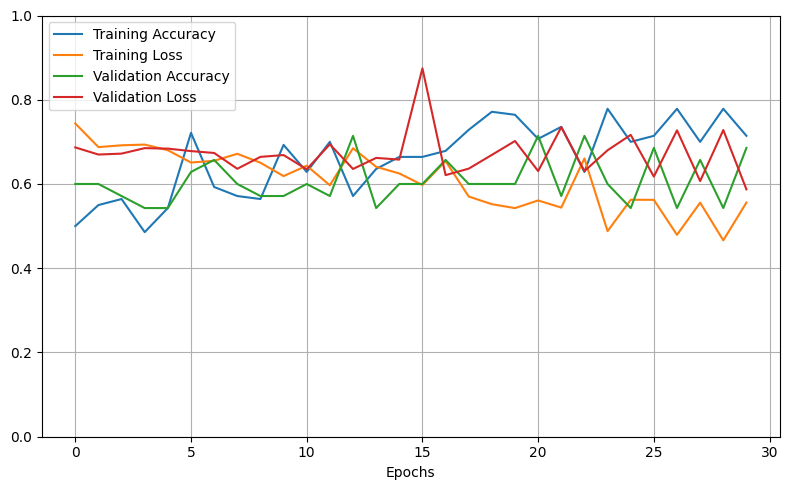

In [77]:
ax = pd.DataFrame(history.history).plot(figsize=(8, 5))
ax.set_xlabel('Epochs')
ax.legend(['Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.tight_layout()

Test model on data from first files:

In [78]:
def import_images(folder_path):
  image_size = (128, 128) #Resize images to all be the same dimension, PCA doesn't work otherwise
  images = []

  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert("L")   # convert image to grayscale
    img = img.resize(image_size)
    images.append(np.array(img))

  images = np.array(images)

  print('Shape before flattening, before PCA:', images.shape)
  X = images.reshape(len(images), -1) #Flatten images to 2d
  #42 images x 16384 pixels for each iamges
  print('Shape of images after flattening', X.shape)
  return X

In [79]:
X_blurred = import_images('/content/drive/MyDrive/image_files/v0/blurred')
X_features = import_images('/content/drive/MyDrive/image_files/v0/features')
X_geons = import_images('/content/drive/MyDrive/image_files/v0/geons')
X_realistic = import_images('/content/drive/MyDrive/image_files/v0/realistic')
X_silhouettes = import_images('/content/drive/MyDrive/image_files/v0/silhouettes')

Shape before flattening, before PCA: (42, 128, 128)
Shape of images after flattening (42, 16384)
Shape before flattening, before PCA: (42, 128, 128)
Shape of images after flattening (42, 16384)
Shape before flattening, before PCA: (60, 128, 128)
Shape of images after flattening (60, 16384)
Shape before flattening, before PCA: (41, 128, 128)
Shape of images after flattening (41, 16384)
Shape before flattening, before PCA: (40, 128, 128)
Shape of images after flattening (40, 16384)


In [80]:
#Combine all the data from the folders of the first files
X_original_all = np.concatenate((X_blurred, X_features, X_geons, X_realistic, X_silhouettes), axis=0)
#Find the file types for those files and combine them
all_file_types = blurred_file_types + features_file_types + geons_file_types + \
realistic_file_types + silhouettes_file_types

#Scale pixel intensities to 0-1 range by dividing by 255
X_original_all = X_original_all/255.0

#Then make a df
all_original_df = pd.DataFrame(X_original_all)
all_original_df['file_types'] = all_file_types

In [81]:
#Only include duck and car images
original_duck_car_df = all_original_df[all_original_df['file_types'].isin(['duck', 'car'])]
#Labels, car is 0, duck is 1
original_duck_car_df['label'] = original_duck_car_df['file_types'].map({'car': 0, 'duck': 1})

#Separate into features and labels, then reshape features for model
original_features = np.array(original_duck_car_df.drop(['file_types', 'label'], axis=1))
original_labels = np.array(original_duck_car_df['label'])
original_features = original_features.reshape(original_features.shape[0], 128, 128)
original_features.shape

/tmp/ipython-input-3601766541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_duck_car_df['label'] = original_duck_car_df['file_types'].map({'car': 0, 'duck': 1})


(57, 128, 128)

In [82]:
test_loss, test_accuracy = model.evaluate(original_features, original_labels)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5722 - loss: 0.8880
Testing Loss: 0.9081541299819946
Testing Accuracy: 0.5614035129547119


Model improves on random guessing, but not by an extremely large amount.

**C. How many parameters does the network have? How many of those parameters are bias parameters? [2 point]**

In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,638,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,644,793 (6.27 MB)

 Trainable params: 1,644,791 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**The model has 1,644,791 parameters:**

128*128 = 16,384
(16384 * 100) + 100 = 1,638,500
(100 * 50) + 50 = 5,050
(50 * 20) + 20 = 1,020
(20 * 10) + 10 = 210
(10 * 1) + 1 = 11

1,638,500  + 5,050 + 1,020 + 210 + 11 = **1,644,791**

100 + 50 + 20 + 10 + 1 = **181 of them are bias parameters**

Also, apparaently 2 optimizer parameters as shown above.